**NeetCode's excel sheet for blind 75**

 https://docs.google.com/spreadsheets/d/1A2PaQKcdwO_lwxz9bAnxXnIQayCouZP6d-ENrBz_NXc/edit#gid=0
 
 https://github.com/neetcode-gh/leetcode

**Complexity cheat sheet**

https://www.geeksforgeeks.org/complexity-cheat-sheet-for-python-operations/

In [1]:
# 230. Kth Smallest Element in a BST
# https://leetcode.com/problems/kth-smallest-element-in-a-bst/

class TreeNode:
    def __init__(self, val):
        self.left, self.right = None, None
        self.val = val

class Solution:
    
    def inorder(self, root):
        if not root:
            return []
        return self.inorder(root.left) + [root.val] + self.inorder(root.right) 
    
    def kth_smallest(self, root, k):
        return self.inorder(root)[k-1]

In [2]:
# 211. Design Add and Search Words Data Structure
# https://leetcode.com/problems/design-add-and-search-words-data-structure

class WordDictionary:

    def __init__(self):
        self.trie = {}

    def addWord(self, word: str) -> None:
        node = self.trie
        for letter in word:
            if letter not in node:
                node[letter] = {}
            node = node[letter]
        node['$'] = True
        
    def search(self, word: str) -> bool:
        
        def search_helper(word, node):
            for i, letter in enumerate(word):
                if letter not in node:
                    if letter == '.':
                        for key in node:
                            if key != '$' and search_helper(word[i+1:], node[key]):
                                return True
                    return False
                else:
                    node = node[letter]

            return '$' in node
        
        return search_helper(word, self.trie)
        
word = WordDictionary()
word.addWord('cat')
word.trie
# {'c': {'a': {'t': {'$': True}}}}
word.search('c...b')

# Time O(M) # the "well-defined" words without dots, and O(N 26 ^ M) for the "undefined" words.
# Space O(1)

False

In [ ]:
# https://leetcode.com/problems/word-search-ii/
class Solution:
    def findWords(self, board: List[List[str]], 
                  words: List[str]) -> List[str]:
        trie = {}
        delim = "$"
        result = []
        ROWS = len(board)
        COLS = len(board[0])
        
        def build_trie():
            for word in words:
                node = trie
                for char in word:
                    if char not in node:
                        node[char] = {}
                    node = node[char]
                node["$"] = word
        
        
        build_trie()
        
        def dfs(r, c, node, visited):
            
            if not (0<=r<ROWS and 0<=c<COLS):
                return
            if (r,c) in visited or board[r][c] not in node:
                return
            
            visited.add((r,c))
            node = node[board[r][c]]
            
            if delim in node:
                result.append(node["$"])
                del node["$"]
            
            dfs(r+1, c, node, visited)
            dfs(r, c+1, node, visited)
            dfs(r-1, c, node, visited)
            dfs(r, c-1, node, visited)
            
            visited.remove((r,c))
    
        for r in range(ROWS):
            for c in range(COLS):
                dfs(r, c, trie, set())
                    
        return result
           
board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]]
words = ["oath","pea","eat","rain"] 

board = [["o","a","b","n"],
         ["o","t","a","e"],
         ["a","h","k","r"],
         ["a","f","l","v"]]
words = ["oa","oaa"]

board = [["a","a"]]
words = ["aa"]
board = [["o","a","a","n"],
         ["e","t","a","e"],
         ["i","h","k","r"],
         ["i","f","l","v"]]
words = ["oath","pea","eat","rain","hklf", "hk"]
Solution().findWords(board, words)



In [ ]:
# 105. Construct Binary Tree from Preorder and Inorder Traversal

class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        
        
class Solution:
    def buildTree(self, preorder: List[int], 
                  inorder: List[int]) -> Optional[TreeNode]:
        
        if preorder == [] or inorder == []:
            return None
        
        popped = preorder.pop(0)
        root = TreeNode(popped)
        index = inorder.index(popped)
                
        root.left = self.buildTree(preorder[:index], inorder[:index])
        root.right = self.buildTree(preorder[index:], inorder[index+1:])
        
        return root

preorder = [3,9,20,15,7]
inorder = [9,3,15,20,7]
result = Solution().buildTree(preorder, inorder)

def print_tree(root):
    if root is None:
        return 
    print(root.val)
    print_tree(root.left)
    print_tree(root.right)
    
print_tree(result)

# O(n)
# O(n)

In [ ]:
# 98. Validate Binary Search Tree
# Blind 75
# More Elegant and easy solution
# https://www.youtube.com/watch?v=s6ATEkipzow
class Solution:
    def is_valid(self, root):
        
        def valid(root, low, high):
            if root is None:
                return True
            
            if not (low <root.val < high):
                return False
            
            return valid(root.left, low, root.val) and \
                    valid(root.right, root.val, high)
            
        return valid(root, -math.inf, math.inf)

root = TreeNode(2)
root.left = TreeNode(3)
root.right = TreeNode(1)
Solution().is_valid(root)

In [ ]:
# https://leetcode.com/problems/path-sum/

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def hasPathSum(self, root: Optional[TreeNode], targetSum: int) -> bool:
        if root is None:
            return False
        
        targetSum -= root.val
        if root.left is None and root.right is None:
            return targetSum==0

        return self.hasPathSum(root.left, targetSum) or self.hasPathSum(root.right, targetSum) 

In [1]:
# 124. Binary Tree Maximum Path Sum
# A path in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence at most once. Note that the path does not need to pass through the root.

# The path sum of a path is the sum of the node's values in the path.

# Given the root of a binary tree, return the maximum path sum of any non-empty path.


# Input: root = [1,2,3]
# Output: 6
# Explanation: The optimal path is 2 -> 1 -> 3 with a path sum of 2 + 1 + 3 = 6.

# Input: root = [-10,9,20,null,null,15,7]
# Output: 42
# Explanation: The optimal path is 15 -> 20 -> 7 with a path sum of 15 + 20 + 7 = 42.
import math   
    
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left, self.right = None, None
        
class Tree:
    
    def max_path_sum(self, root):
        
        def helper(root):
            if root.left is None and root.right is None:
                return root.val

            left_t = max(helper(root.left), 0)
            right_t = max(helper(root.right), 0)
            
            self.max_path_total = max(self.max_path_total, 
                                      left_t + right_t + root.val)
            
            return max(left_t, right_t) + root.val
        
        self.max_path_total = -math.inf
        helper(root)
        
        return self.max_path_total

        
    def get_max_depth(self, root):
        if root is None:
            return 0
        
        return max(self.get_max_depth(root.left),
                   self.get_max_depth(root.right)) + 1
    
# Input: root = [-10,9,20,null,null,15,7]
# Output: 42
# Explanation: The optimal path is 15 -> 20 -> 7 with a path sum of 15 + 20 + 7 = 42.
        
root = TreeNode(-10)
root.left = TreeNode(9)
root.right = TreeNode(20)
root.right.left = TreeNode(15)
root.right.right = TreeNode(7)

Tree().max_path_sum(root)


42

In [ ]:
# https://leetcode.com/problems/pacific-atlantic-water-flow/
# 417. Pacific Atlantic Water Flow

class Solution:
    def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:
        
        pac_set = set()
        atl_set = set()
        
        ROWS = len(heights)
        COLS = len(heights[0])
        
        def dfs(r, c, visited, prevHeight):
            
            if (r, c) in visited:
                return
            if not (0<=r<ROWS and 0<=c<COLS):
                return
            if heights[r][c] < prevHeight:
                return 
            
            visited.add((r, c))
            
            prevHeight = heights[r][c]
            dfs(r+1, c, visited, prevHeight)
            dfs(r-1, c, visited, prevHeight)
            dfs(r, c+1, visited, prevHeight)
            dfs(r, c-1, visited, prevHeight)
                    
        for c in range(COLS):
            dfs(0, c, pac_set, heights[0][c])
            dfs(ROWS-1, c, atl_set, heights[ROWS-1][c])
            
        for r in range(ROWS):
            dfs(r, 0, pac_set, heights[r][0])
            dfs(r, COLS-1, atl_set, heights[r][COLS-1])
            
        return atl_set.intersection(pac_set)
    
heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
# [[0,4],[1,3],[1,4],[2,2],[3,0],[3,1],[4,0]]
heights = [[2,1],[1,2]]    # {(0, 0), (0, 1), (1, 0), (1, 1)}              
heights = [[1,2,3],
           [8,9,4],
           [7,6,5]]
heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
Solution().pacificAtlantic(heights)

In [8]:
# 128. Longest Consecutive Sequence
# https://leetcode.com/problems/longest-consecutive-sequence/
# blind 75
from typing import List
class Solution:
    def longestConsecutive(self, nums: List[int]) -> int:
        
        sett = set(nums)
        max_len = 1
        
        for i, num in enumerate(nums):
            if num-1 in sett:
                continue
            else:
                curr_len = 1
                while num+1 in sett:
                    num += 1
                    curr_len += 1
                max_len = max(max_len, curr_len)
                
        return max_len

lst = [100,4,200,1,3,2]
Solution().longestConsecutive(lst)

4

In [3]:
# 226. Invert Binary Tree
# https://leetcode.com/problems/invert-binary-tree/
from typing import Optional
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right =None
        
class Solution:
    def invertTree(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        
        if root is None:
            return None
        
        left = self.invertTree(root.left)
        right = self.invertTree(root.right)
        
        root.left = right
        root.right = left
        
        return root

###  Invert Tree
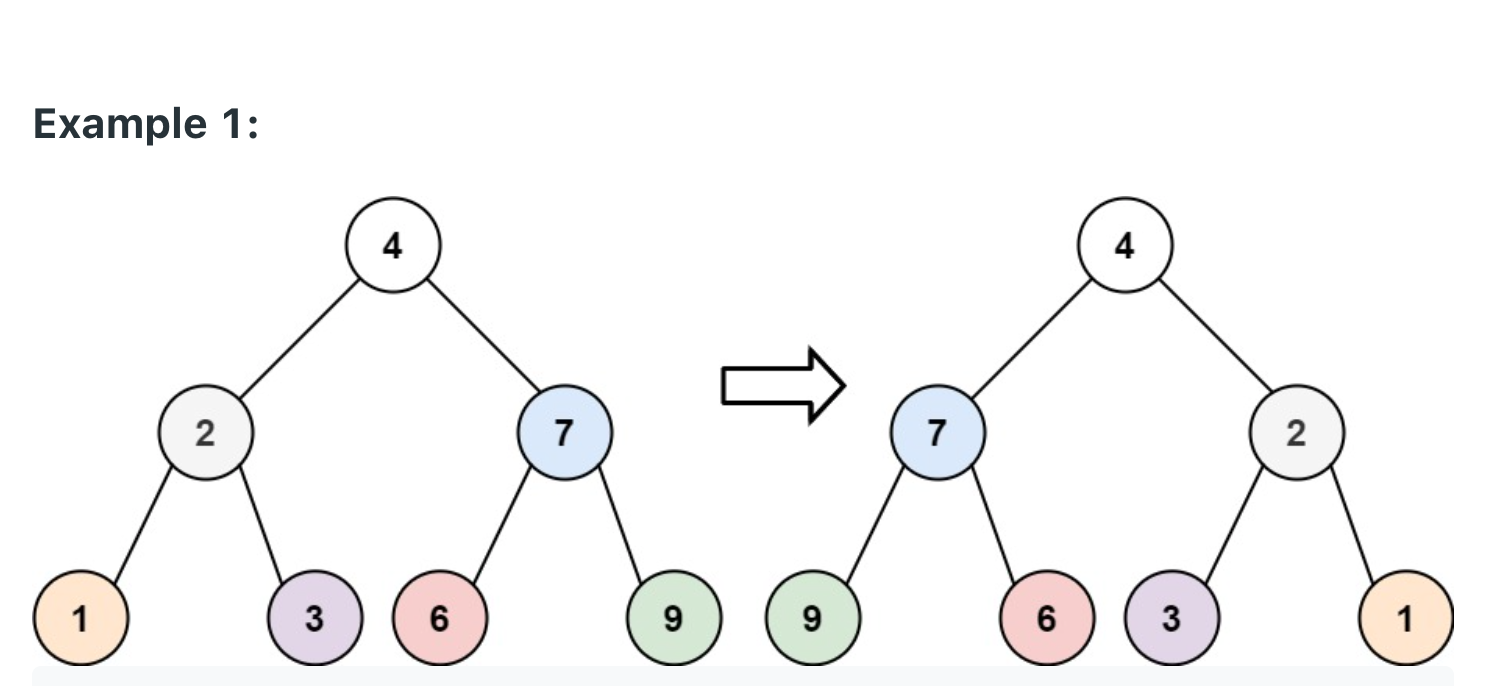

In [4]:
# 100. Same Tree
# https://leetcode.com/problems/same-tree/
# Blind 75

class Solution:
    def isSameTree(self, p: Optional[TreeNode], 
                   q: Optional[TreeNode]) -> bool:
    
        if p is None and q is None:
            return True
        if p and q:
            return (p.val == q.val) and self.isSameTree(p.left, q.left) and self.isSameTree(p.right, q.right)
        else:
            return False

# All Pallindromic

In [10]:
# Minimum insertions in a string to make it a palindrome¶
# same for deletions
def remove_char(strng):
    
    def recur(start, end, strng):
        if start >= end:
            return 0
        
        if strng[end] == strng[start]:
            return recur(start+1, end-1, strng)
        
        c1 = recur(start+1, end, strng)
        c2 = recur(start, end-1,  strng)
        
        return min(c1, c2) +1
    
    return recur(0, len(strng)-1, strng)

text = "abdbca" #1
text = "cddpd"#2
remove_char(text)

2

In [3]:
# https://www.youtube.com/watch?v=3jvWodd7ht0&t=5s
# https://leetcode.com/problems/palindrome-partitioning/
from typing import List
class Solution:
    def partition(self, s: str) -> List[List[str]]:
        res = []
        N = len(s)
        
        def is_palindrome(strng):
            return strng == strng[::-1]
        
        def dfs(start, subset):
            if start >= N:
                res.append(subset)
                return
                
            for end in range(start, N):
                if is_palindrome(s[start:end+1]):
                    dfs(end+1, subset+[s[start:end+1]])
                    
        dfs(0, [])
        return res

s = "aaa" # [['a', 'a', 'b'], ['aa', 'b']]
Solution().partition(s)

[['a', 'a', 'a'], ['a', 'aa'], ['aa', 'a'], ['aaa']]

In [16]:
# https://leetcode.com/problems/palindrome-partitioning-ii/
# Palindromic Partitioning
# Given a string, we want to cut it into pieces such that each piece 
# is a palindrome. Write a function to return the minimum number of cuts 
# needed.

def is_pallindrome(strng):
    return strng == strng[::-1]

def partition_to_pallindorme(strng):
    
    def recur(strng, start, end):
        if start >= end or is_pallindrome(strng[start : end+1]):
            return 0
        
        partitions = float('inf')
        for i in range(start, end):
            count = 1 + recur(strng, start, i) + recur(strng, i+1, end)
            partitions = min(partitions, count)
            
        return partitions
    
    return recur(strng, 0, len(strng)-1)

strng = "ababbbabbababa"
partition_to_pallindorme(strng)

3

In [20]:
# https://www.youtube.com/watch?v=4RACzI5-du8&t=287s
class Solution:
    def countSubstrings(self, s: str) -> int:
        N = len(s)
        count = 0

        for center in range(N):
            # oddpalindrome
            left, right = center, center
            while 0<=left<=right<N and s[left] == s[right]:
                count += 1
                left -=1 
                right +=1
            
            # evenpalindrome
            left, right = center, center+1
            while 0<=left<=right<N and s[left] == s[right]:
                count += 1
                left -=1
                right +=1

        return count

s = 'aaa'
Solution().countSubstrings(s)

6

In [ ]:
# https://leetcode.com/problems/longest-palindromic-substring/
class Solution:
    def longestPalindrome(self, s: str) -> str:
        
        N = len(s)
        res = ""
        res_len = 0
        
        for center in range(N):
            
            # oddpalindrome
            left, right = center, center
            while 0<=left<=right<N and s[left] == s[right]:
                curr_len = right-left +1
                if curr_len > res_len:
                    res_len = curr_len
                    res = s[left:right+1]
                left -=1 
                right +=1
            
            # evenpalindrome
            left, right = center, center+1
            while 0<=left<=right<N and s[left] == s[right]:
                curr_len = right-left +1
                if curr_len > res_len:
                    res_len = curr_len
                    res = s[left:right+1]
                left -=1 
                right +=1
                
        return res
    

# dynamic prog

In [ ]:
# 322. Coin Change
# Blind 75
# https://leetcode.com/problems/coin-change/

class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        
        dp = [amount + 1] * (amount + 1) # amount + 1 for storing solutions from 0...n
        # math.inf can be replaced by amount + 1, as the smallest denonmination is 1, so max sum is amount+1
        
        dp[0] = 0
        
        for a in range(amount+1):
            for c in coins:
                if a-c >= 0:
                    dp[a] = min(dp[a], 1+dp[a-c])
        
        return dp[amount] if dp[amount]!= amount + 1 else -1

coins = [1,2,5], amount = 11 # output 3, 11 = 5 + 5 + 1


In [ ]:
# https://leetcode.com/problems/longest-increasing-subsequence/
class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        N = len(nums)
        
        def recur(prev, curr):
            if curr == len(nums):
                return 0
            
            if dp[prev+1][curr] == -1:
                c1 = 0
                if prev==-1 or nums[prev] < nums[curr]:
                    c1 = 1 + recur(curr, curr+1)
                c2 = recur(prev, curr+1)
                dp[prev+1][curr] = max(c1, c2)
            
            return dp[prev+1][curr]
        
        dp = [[-1 for _ in range(N)] for _ in range(N+1)]
        
        return recur(-1, 0)

nums = [10,9,2,5,3,7,101,18] 
Solution().lengthOfLIS(nums)

class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        N = len(nums)
        max_len = 1 
        dp = [1 for _ in range(N)]
        
        for curr in range(N):
            for prev in range(curr):
                if nums[prev] < nums[curr]:
                    dp[curr] = max(dp[curr], dp[prev] + 1)
                    max_len = max(max_len, dp[curr])
        
        return max_len

nums = [10,9,2,5,3,7,101,18] #4 
nums = [0,1,0,3,2,3] #4
nums = [7,7,7,7,7,7,7] #
nums = [1,3,6,7,9,4,10,5,6] #6
nums =  [0,1,0,3,2,3]
Solution().lengthOfLIS(nums)    

In [23]:
# https://leetcode.com/problems/maximum-product-subarray/
# Dynamic Prog
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        res = max(nums)
        curr_min = 1
        curr_max = 1
        for n in nums:
            new_max = max(curr_max*n, curr_min*n, n)
            new_min = min(curr_max*n, curr_min*n, n)
            curr_max, curr_min = new_max, new_min
            res = max(res, curr_max)
            
        return res

nums = [2,3,-2,4, 15]
# nums = [-2,0,-1]
Solution().maxProduct(nums)     

60

In [ ]:
# https://leetcode.com/problems/unique-paths/
class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
       
        memo = {}
        
        def dfs(r, c, visited):
            
            if r==m-1 and c==n-1:
                return 1
            
            if not (0<=r<m and 0<=c<n):
                return 0
            
            visited.add((r,c))
            
            if (r, c) not in memo:
                c1 = dfs(r+1, c, visited)
                c2 = dfs(r, c+1, visited)
                memo[(r, c)] = c1+c2
                
            return memo[(r, c)]
            
        return dfs(0, 0, set())
    
m = 3; n = 7
m = 3; n = 2
m = 23; n=12
Solution().uniquePaths(m, n)  


class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        if (m, n) == (0,0):
            return 0
        if m==0 or n==0:
            return 1
        
        dp = [[0 for _ in range(n)] for _ in range(m)]
        
        for c in range(n): dp[0][c]=1
        for r in range(m): dp[r][0]=1

        for r in range(1,m):
            for c in range(1, n):
                c1, c2 =0, 0
                if 0<=r<m:
                    c1 = dp[r-1][c]
                if 0<=c<n:
                    c2 = dp[r][c-1]
                dp[r][c] = c1+c2
        return dp[-1][-1]

# m = 3; n = 7
# m = 3; n = 2
m = 23; n=12
Solution().uniquePaths(m, n)  

In [ ]:
# https://leetcode.com/problems/triangle/submissions/

class Solution:
    def minimumTotal(self, triangle: List[List[int]]) -> int:
        
        ROWS,COLS = len(triangle), len(triangle[-1])
        
        dp = triangle[-1]
        
        # COLS = 4, index 3
        for r in range(ROWS-2, -1, -1):    # 3
            for i in range(COLS-1): # [4,1,8,3] when i= 2, r, 3
                row = triangle[r]
                dp[i] = row[i] + min(dp[i], dp[i+1])
            
            COLS -= 1
            print(dp, COLS)

        return dp[0]
    

triangle = [
    [2],
    [3,4],
    [6,5,7],
    [4,1,8,3]
]
# triangle = [
#     [-1],
#     [2,3],
#     [1,-1,-3]
# ]

triangle =  [[-10]]

Solution().minimumTotal(triangle)

In [44]:
import math
def apartmentHunting(blocks, reqs):
    
    n_blocks = len(blocks)
    n_reqs = len(reqs)
    
    dp = [[math.inf for _ in range(n_reqs+1)] 
                    for _ in range(n_blocks)]

    for r in range(n_blocks):
        curr_block = blocks[r]
        for c in range(n_reqs):
            req = reqs[c]
            if r==0 and curr_block[req]:
                dp[r][c] = 0 
            elif curr_block[req]:
                dp[r][c] = 0
            else:
                dp[r][c] = dp[r-1][c] + 1
    
    print(dp)         
    for r in range(n_blocks-1, -1, -1):
        curr_block = blocks[r]
        dp[r][n_reqs] = 0
        for c in range(n_reqs):
            if curr_block[req] is False and r < n_blocks-1: 
                dp[r][c] = min(dp[r+1][c] + 1, dp[r][c])
            dp[r][n_reqs] = max(dp[r][n_reqs], dp[r][c])

    print(dp)   
    min_index = None
    min_dist = math.inf
    for r in range(n_blocks):
        if dp[r][n_reqs]<min_dist:
            min_dist = dp[r][n_reqs]
            min_index = r
        
    return min_index
    
    
blocks = [
  {
    "gym": False,
    "school": True,
    "store": False
  },
  {
    "gym": True,
    "school": False,
    "store": False
  },
  {
    "gym": True,
    "school": True,
    "store": False
  },
  {
    "gym": False,
    "school": True,
    "store": False     
  },
  {
    "gym": False,
    "school": True,
    "store": True
  }
]

reqs = ["gym", "school", "store"]

apartmentHunting(blocks, reqs)

[[inf, 0, inf, inf], [0, 1, inf, inf], [0, 0, inf, inf], [1, 0, inf, inf], [2, 0, 0, inf]]
[[1, 0, 4, 4], [0, 1, 3, 3], [0, 0, 2, 2], [1, 0, 1, 1], [2, 0, 0, 2]]


3

In [ ]:
# https://leetcode.com/problems/jump-game/

class Solution:
    def canJump(self, nums: List[int]) -> bool:
        
        N = len(nums)
        if N==1 :
            return True
        
        dp = [False]*N
        dp[0] = True
        
        i = 0
        while i < N:
            if dp[i]:
                for k in range(nums[i]):
                    if i+k+1 < N:
                        dp[i+k+1] = True
                        if dp[-1] == True:
                            return True
            i += 1 
        
        return False
"""
T T T F F
i=0, 
k-> 0, 1
dp[1, 2]

"""
    
    
nums = [2,3,1,1,4]
nums = [3,2,1,0,4]
nums = [2,3,1,1,4]
Solution().canJump(nums)      
        
#DP O(n)
class Solution:
    def canJump(self, nums: List[int]) -> bool:
        N = len(nums)
        goal = len(nums)-1
        
        for i in range(N-1, -1, -1):
            if i + nums[i] >= goal:
                goal=i
        
        return goal==0

nums = [2,3,1,1,4]
# nums = [3,2,1,0,4]
nums = [2,3,1,1,4]
# nums = [2,0,0, 1]
Solution().canJump(nums)      
        

# Binary Search

In [2]:
# https://leetcode.com/problems/find-minimum-in-rotated-sorted-array/
# Blind 75
class Solution:
    def findMin(self, nums: List[int]) -> int:
        
        N = len(nums)
        start = 0
        end = N-1
        
        while start<end:
            mid = (start+end)//2
            if nums[mid-1]>nums[mid]:
                break
            elif nums[mid]> nums[end]:
                start = mid+1
            else:
                end = mid
        
        return nums[start]
        
nums = [2,4,5,6,7,0,1,]
Solution().findMin(nums)

UnboundLocalError: local variable 'mid' referenced before assignment

In [36]:
# https://leetcode.com/problems/search-in-rotated-sorted-array/

class Solution:
    def search(self, nums: List[int], target: int) -> int:
        
        N = len(nums)
        start = 0
        end = N-1
        
        while start<=end:
            mid = (start+end)//2
            if nums[mid] == target:
                return mid
            
            if nums[start] <= nums[mid]:
                # if left is sorted
                if nums[start] <= target < nums[mid]:
                    end = mid-1
                else:
                    start = mid+1
            else:
                #right is sorted
                if nums[mid] < target <= nums[end]:
                    start = mid+1
                else:
                    end = mid-1

        return -1
                
nums = [5,1,3]; target = 5
# nums = [7,0,1,2,4,5,6]; target=0
# nums = [4,5,6,7,0,1,2]; target=3

Solution().search(nums, target)

0

In [ ]:
# https://leetcode.com/problems/find-k-closest-elements/
from collections import deque
class Solution:
    def findClosestElements(self, arr: List[int], 
                            k: int, x: int) -> List[int]:
        
        N = len(arr)
        
        def binary_search():
            l, r = 0, N-1
            while l<=r:
                mid = (l+r)//2
                if arr[mid] == x:
                    return mid
                if arr[mid] < x:
                    l = mid+1
                else:
                    r = mid-1
            return l
        
        i = binary_search()
        l, r = i-1, i
        
        for _ in range(k):
            if l<0 or (r<N and abs(arr[l]-x)>abs(arr[r]-x)):
                r += 1
            else:
                l -= 1
                
        return arr[l+1:r]
            
# arr = [1,2,3,4,5]; k = 4; x = 3
# arr = [1,2,3,4,5]; k = 4; x = 2
# arr = [0,0,1,2,3,3,4,7,7,8]; k=3; x=3
arr = [1,1,1,10,10,10]; k=1; x=9
Solution().findClosestElements(arr, k, x)
 

In [2]:
from typing import List
import math

In [37]:
# https://leetcode.com/problems/3sum/

class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        N = len(nums)
        nums.sort()
        result = []
        
        for i in range(0, N):
            if i>0 and nums[i-1] == nums[i]:
                continue
            l, r = i+1, N-1
            while l<r:
                three_sum = nums[i] + nums[l] + nums[r]
                if three_sum>0:
                    r -= 1
                elif three_sum<0:
                    l += 1
                else: # three_sum == 0
                    result.append((nums[i], nums[l], nums[r]))
                    l += 1
                    r -= 1
                    while nums[l] == nums[l-1] and l<r:
                        l += 1
        return result
                
nums = [-1,0,1,2,-1,-4]
# nums = []
# nums = [0]
Solution().threeSum(nums)

[(-1, -1, 2), (-1, 0, 1)]

In [ ]:
# https://leetcode.com/problems/insert-interval/

class Solution:
    def insert(self, intervals: List[List[int]], 
               newInterval: List[int]) -> List[List[int]]:
        
        result = []
        N = len(intervals)
        for i in range(N):
            if newInterval[1] < intervals[i][0]:
                result.append(newInterval)
                return result + intervals[i:]
            elif newInterval[0] > intervals[i][1]:
                result.append(intervals[i])
                continue
            else:
                newInterval = (min(newInterval[0], intervals[i][0]), 
                               max(newInterval[1], intervals[i][1]))
        
        result.append(newInterval)
        
        return result
                
intervals = [[1,3],[6,9]]; newInterval = [10,11]
# intervals = [[1,3],[6,9]]; newInterval = [2,6]
intervals = [[1,3],[6,9]]; newInterval = [5,6]
# intervals = []; newInterval = [10,11]
intervals = [[1,2], [3,5], [6,7], [8,10], [12,16]]; newInterval = [4,8]
intervals =  [[1,5]]; newInterval= [6,8]
intervals =  []; newInterval= [6,8]

Solution().insert(intervals, newInterval)

In [43]:
# https://leetcode.com/problems/non-overlapping-intervals/

class Solution:
    def eraseOverlapIntervals(self, intervals: List[List[int]]) -> int:
        
        intervals.sort()
        
        prev_end = intervals[0][1]
        res=0
        
        for interval in intervals[1:]:
            if prev_end <= interval[0]:
                prev_end = interval[1]
            else:
                res += 1
                prev_end = min(prev_end, interval[1])
            
        return res

intervals = [[1,2],[1,3],[2,3],[3,4]]
Solution().eraseOverlapIntervals(intervals)

1

In [4]:
class Codec:
    delimiter = "#"
    def encode(self, strs: [str]) -> str:
        """Encodes a list of strings to a single string.
        """
        
        result = ""
        for s in strs:
            result += str(len(s)) + self.delimiter + s
            
        return result

    def decode(self, s: str) -> [str]:
        """Decodes a single string to a list of strings.
        "hi" "2#hi"
        """
        N = len(s)
        
        result = []
        start = end = 0
        
        while end < N:
            if s[end] == self.delimiter:
                length = int(s[start:end])
                result.append(s[end+1:end+1+length])
                start = end = end+1+length
            else:
                end += 1
            
        return result

strs = [""]
codec = Codec()
encoded = codec.encode(strs)
decoded = codec.decode(encoded)
print(encoded, decoded)

0# ['']


In [ ]:
# https://leetcode.com/problems/lowest-common-ancestor-of-a-binary-search-tree/
    
class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', 
                             p: 'TreeNode', 
                             q: 'TreeNode') -> 'TreeNode':
        
        while root:
            if p.val > root.val and q.val > root.val:
                root = root.right
            elif p.val<root.val and q.val < root.val:
                root = root.left
            else:
                return root

In [46]:
# https://leetcode.com/problems/move-zeroes/submissions/
class Solution:
    def moveZeroes(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        N = len(nums)
        l = 0
        
        for r in range(N):
            if nums[r]:
                nums[l], nums[r] = nums[r], nums[l]
                l += 1
            
        return nums

nums = [0,1,0,3,12]    
Solution().moveZeroes(nums)

[1, 3, 12, 0, 0]

# Graph

In [ ]:
# Alternate solution
# https://leetcode.com/problems/course-schedule/
# directed graph 
class Solution:
    def canFinish(self, numCourses: int, 
                  prerequisites: List[List[int]]) -> List[int]:
        
        graph = {i:[] for i in range(numCourses)}
        for preq in prerequisites:
            graph[preq[0]].append(preq[1])
        
        cycle, visited = set(), set()
        
        def dfs(key):
            if key in visited: 
                return True
            if key in cycle:
                return False 
            
            cycle.add(key)
            for nei in graph[key]:
                if not dfs(nei):
                    return False
            
            cycle.remove(key)
            visited.add(key)
            
            return True

        for i in range(numCourses):
            if not dfs(i):
                return False
        
        return True

# Complexity: O(E + V^2)
# Space : building graph (E+V), dfs stack will take V space, 
# space for visited/cycle

# TOP Sort
from collections import deque
class Solution:
    def canFinish(self, numCourses: int, 
                  prerequisites: List[List[int]]) -> bool:

        graph = {i:[] for i in range(numCourses)}
        indegree = {i:0 for i in range(numCourses)}
        
        for start, end in prerequisites:
            graph[start].append(end)
            indegree[end] += 1
            
        sources = deque()
        for i, indeg in indegree.items():
            if indeg ==0:
                sources.append(i)
        
        top_sort = []
        while sources:
            popped_source = sources.popleft()
            top_sort.append(popped_source)
            
            for child in graph[popped_source]:
                indegree[child] -= 1
                if indegree[child] == 0 :
                    sources.append(child)
         
        return len(top_sort) == numCourses

In [ ]:
# https://leetcode.com/problems/course-schedule-ii/

# DFS or TopSort 
# TopSort Completexity for Space and Time is  O(V+E)
class Solution:
    def findOrder(self, numCourses: int, 
                  prerequisites: List[List[int]]) -> List[int]:
            
        graph = {i:[] for i in range(numCourses)}
        for preq in prerequisites:
            graph[preq[0]].append(preq[1])
        
        output = []
        cycle, visited = set(), set()
        
        def dfs(node):
            if node in cycle:
                return False
            
            if node in visited:
                return True
            
            cycle.add(node)
            for nei in graph[node]:
                if not dfs(nei):
                    return False

            visited.add(node)
            cycle.remove(node)
            output.append(node) ## what is different form above
            
            return True
        
        visited = set()
        for i in range(numCourses):
            if not dfs(i):
                return []

        return output            ## what is different form above
        

In [ ]:
# https://leetcode.com/problems/graph-valid-tree/
# 261. Graph Valid Tree
# A valid tree has no cycles

# undirected graph: all nodes should be connected without cycle
from collections import defaultdict
class Solution:
    
    def validTree(self, n, edges):
        
        visited = set()
        adj = defaultdict(list)
        
        for parent, child in edges:
            adj[parent].append(child)
            adj[child].append(parent)
        
        def dfs(node, prev):
            if node in visited:
                return False
            
            visited.add(node)
            neighboors = adj[node]
            for neigh in neighboors:
                if neigh == prev:
                    continue
                if not dfs(neigh, node):
                    return False
                    
            return True
            
        return dfs(0, -1) and len(visited) == n
    
n = 5
edges = [[0,1],[0,2],[0,3],[2,3],[1,4]]

IsGraphATree().is_valid_tree(n, edges)

# Complexity: O(E+V)

In [2]:
# https://leetcode.com/problems/reconstruct-itinerary/
from collections import defaultdict
from typing import List
class Solution:
    def findItinerary(self, tickets: List[List[str]]) -> List[str]:
        
        N = len(tickets)
        graph = defaultdict(list)
        
        for source, dest in tickets:
            graph[source].append(dest)
        
        for source, dest in graph.items():
            dest.sort()
        
        route = ["JFK"]
        def dfs(source):
            if len(route)==N+1:
                return True
            if source not in graph:
                return False
            
            n = len(graph[source])
            
            for i in range(n):
                new_source = graph[source].pop(i)
                route.append(new_source)
                if dfs(new_source):
                    return True
                route.pop()
                graph[source].insert(i, new_source) 
            
        dfs("JFK")
        return route

tickets =[ ["JFK","SFO"],["JFK","ATL"],
           ["SFO","ATL"],["ATL","JFK"],
           ["ATL","SFO"]]

tickets = [["MUC","LHR"],["JFK","MUC"],["SFO","SJC"],["LHR","SFO"]]
tickets =  [["JFK","KUL"],["JFK","NRT"],["NRT","JFK"]]
Solution().findItinerary(tickets)

['JFK', 'NRT', 'JFK', 'KUL']

In [4]:
from typing import List
from collections import defaultdict, deque

class Solution:
    def maximumDetonation(self, bombs: List[List[int]]) -> int:
        
        n = len(bombs)
        ans = 0
        graph = defaultdict(list) #lambda: []
        
        def check(i,j):
            #is it within range
            return (bombs[i][0] - bombs[j][0])**2 + (bombs[i][1] - bombs[j][1])**2 <= bombs[i][2]**2 
        
        for i in range(n):
            for j in range(n):
                if i != j:
                    if check(i,j):
                        graph[i].append(j)
                    
        print(graph)
        
        def dfs(i):
            stack = deque()
            stack.append(i)
            visit = set()
            visit.add(i)
            
            while stack:
                bomb = stack.pop()   #if popleft or appendleft then it is dfs
                for nei in graph[bomb]:
                    if nei not in visit:
                        stack.append(nei)
                        visit.add(nei)
            return len(visit)
        
        for i in range(n):
            ans = max(ans, dfs(i))
        return ans
    
bombs = [[1,2,3],[2,3,1],[3,4,2],[4,5,3],[5,6,4]] 
Solution().maximumDetonation(bombs)

defaultdict(<class 'list'>, {0: [1, 2], 2: [1, 3], 3: [1, 2, 4], 4: [2, 3]})


5

In [ ]:
class Solution:
    def checkValidString(self, s: str) -> bool:
        
        def dfs(open_count, index):
            
            if index == len(s):
                if open_count==0:
                    return True
                else:
                    return False
            
            if open_count<0:
                return False
            
            if memo.get((open_count, index), None) is None:
                if (s[index] == "(" or s[index] == "*") and dfs(open_count+1, index+1):
                    memo[(open_count, index)] = True

                if (s[index] == ")" or s[index] == "*") and dfs(open_count-1, index+1):
                    memo[(open_count, index)] = True

                if s[index] == "*" and dfs(open_count, index+1): #""
                    memo[(open_count, index)] = True
            
                if memo.get((open_count, index), None) is None:
                    memo[(open_count, index)] = False
                
            return memo[(open_count, index)]
        
        
        memo = dict()
        return dfs(0, 0)

In [ ]:
#  a maze using a breadth-first search i
    
# not really a tree but uses BFS

# https://gist.github.com/pr28416/f230c97921058308b8f36ee51a9f6e5e#file-maze-txt-L5

# Finds the shortest path from the starting point to the ending point in a maze

from collections import deque

def solveMaze(maze):
    nrows, ncols = len(maze), len(maze[0])
    visited = [[False for _ in range(ncols)] for _ in range(nrows)]
    
    start = (0,0)
    
    for i in range(nrows):
        for j in range(ncols):
            if maze[i][j] == 'S':
                start = (i, j)
                break
        if start != (0,0):
            break
    if start == (0,0):
        return None
    
    queue = deque()
    queue.appendleft((start[0], start[1], 0))
    
    directions = [[0, 1], [0, -1], [1, 0], [-1, 0]]
    while queue:
        node = queue.pop()
        nrow, ncol, dist = node[0], node[1], node[2]

        visited[nrow][ncol] = True

        if maze[nrow][ncol] == "E":
            return dist

        for i,j in directions:
            nr, nc = nrow+i, ncol+j
            if not (0<=nr<nrows and 0<=nc<ncols) or maze[nr][nc]=="#" or visited[nr][nc]: 
                continue
            queue.appendleft((nr, nc, dist+1))
    return 0
        
maze = [
"########E#######",
"#..........#...#",
"#.######.###.#.#",
"#.##...#..##.#.#",
"#....#..##.....#",
"##.#.########.##",
"##.#.....S.....#",
"################"
]

for i, m in enumerate(maze):
    maze[i] = list(m)

solveMaze(maze)

# Backtracking

In [50]:
# https://leetcode.com/problems/subsets/
# https://leetcode.com/problems/subsets-ii/
class Solution:
    def subsetsWithDup(self, nums: List[int]) -> List[List[int]]:
        nums.sort()
        N = len(nums)
        result = []
        
        def backtrack(index, subsets):
            if index == N:
                #print(subsets)
                result.append(subsets[::])
                return
            
            # include the num
            backtrack(index+1, subsets + [nums[index]])
            
            # exclude
            while index+1<N and nums[index]==nums[index+1]:
                index += 1
            backtrack(index+1, subsets)
            
        backtrack(0, [])
        return result
    
        

nums = [1,1,2]    
Solution().subsetsWithDup(nums)
# 2^n, O(n)# depth of tree

[1, 1, 2]
[1, 1]
[1, 2]
[1]
[2]
[]


[[1, 1, 2], [1, 1], [1, 2], [1], [2], []]

In [ ]:
# https://leetcode.com/problems/permutations-ii/
# https://leetcode.com/problems/permutations/
class Solution():
    def permuteUnique(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        res = []
        nums.sort()
        self.dfs(nums, [], res)
        return res
    
    def dfs(self, nums, path, res):
        if not nums:
            res.append(path)
        
        for i in range(len(nums)):
            if i > 0 and nums[i] == nums[i-1]:
                continue #pass
            else:
                self.dfs(nums[:i]+nums[i+1:], path+[nums[i]], res)
            
Solution().permuteUnique([1,2,3])

In [6]:
class Solution:
    def combinationSum(self, candidates: List[int], 
                       target: int) -> List[List[int]]:
        
        result = []
        N = len(candidates)
        
        def dfs(index, total, subset):
            if total == target:
                result.append(subset)
                return
            if total > target or index==N:
                return
            
            dfs(index, total+candidates[index], 
                       subset + [candidates[index]])
            
            dfs(index+1, total, subset)
            
    
        dfs(0, 0, [])
        
        return result


candidates = [2]; target = 1
Solution().combinationSum(candidates, target)

[]

In [7]:
# https://leetcode.com/problems/combination-sum-ii/

class Solution:
    def combinationSum2(self, candidates: List[int], 
                        target: int) -> List[List[int]]:
        
        candidates.sort()
        result = []
        N = len(candidates)
        
        def dfs(index, total, subset):
            if total==target:
                result.append(subset)
                return
            
            if total > target or index ==N:
                return
            
            for i in range(index, N):
                if i>0 and candidates[i] == candidates[i-1]:
                    continue
                dfs(i+1, total+candidates[i], 
                    subset+[candidates[i]])
        
        dfs(0, 0, [])
        
        return result

candidates = [10,1,2,7,6,1,5]; target = 8
Solution().combinationSum2(candidates, target)

[[1, 2, 5], [1, 7], [2, 6]]

In [8]:
# https://leetcode.com/problems/combinations/
    
class Solution:
    def combine(self, n: int, k: int) -> List[List[int]]:

        def dfs(index, sub):
            if len(sub) == k:
                result.append(sub)
                return
            
            for i in range(index, n):
                dfs(i+1,sub+[i+1])
        
        result = []       
        dfs(0, [])
        return result

n = 4; k = 2   
Solution().combine(n, k)

[[1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]

In [ ]:
# https://leetcode.com/problems/restore-ip-addresses/
class Solution:
    def restoreIpAddresses(self, s: str) -> List[str]:
        
        result = []
        N = len(s)
        
        def dfs(index, k, sub_res):
            if index==N:
                if k==4:
                    result.append(sub_res)
                return
            
            if s[index] =='0':
                dfs(index+1, k+1, sub_res + ['0'])
            else:
                for i in range(index, N):
                    prev = s[index:i+1]
                    if 1<=int(prev)<=255:
                        dfs(i+1, k+1, sub_res+[prev])
                
        dfs(0,0,[])
        
        return [".".join(res) for res in result]


ips = ["25525511135", "0000", "101023"]
for ip in ips:
    print(Solution().restoreIpAddresses(ip))

In [ ]:
# https://leetcode.com/problems/matchsticks-to-square/

class Solution:
    def makesquare(self, matchsticks: List[int]) -> bool:
        
        total = sum(matchsticks)
        if total%4 != 0:
            return False
        
        N = len(matchsticks)
        side_len = total//4
        sides = [0]*4
        
        matchsticks.sort(reverse=True)
        
        # i on matchsticks; j on sides
        def backtrack(i):
            if i == N:
                return True
        
            for j in range(4):
                if matchsticks[i] + sides[j] <= side_len:
                    sides[j] += matchsticks[i]
                    if backtrack(i+1): 
                        return True
                    sides[j] -= matchsticks[i]
                    
            return False
        
        return backtrack(0)

nums = [1,1,2,2,2]
Solution().makesquare(nums)

In [ ]:
# https://leetcode.com/problems/find-unique-binary-string/

class Solution:
    def findDifferentBinaryString(self, nums: List[str]) -> str:
        N = len(nums[0])
        nums = set(nums)
        
        def dfs(index, binary):
            if index == N:
                if binary not in nums:
                    return binary  
                return
            
            res = dfs(index+1, binary+'0')
            if res: 
                return res
            res = dfs(index+1, binary+'1')
            if res:
                return res

        return dfs(0, "")
    

nums = ["01","10"]
Solution().findDifferentBinaryString(nums)

In [ ]:
# https://leetcode.com/problems/splitting-a-string-into-descending-consecutive-values/

class Solution:
    def splitString(self, s: str) -> bool:
        
        N = len(s)
        
        def dfs(index, prev):
            if index == N:
                return True
            
            for j in range(index, N):
                curr_part = int(s[index:j+1])
                if prev == curr_part+1 and dfs(j+1, curr_part):
                    return True
            return False
                
        for i in range(N-1):
            prev = int(s[:i+1]) #[s[0]]
            if dfs(i+1, prev):
                return True

        return False

s = "0500406"
Solution().splitString(s)     

In [13]:
# https://leetcode.com/problems/n-queens/

class Solution:
    def solveNQueens(self, n: int) -> List[List[str]]:
        
        col_set = set()
        pos_diag = set() #(r+c)
        neg_diag = set()  #(r-c)
        positions = []
        
        def dfs(r, result):
            if r == n:
                if len(result) ==4:
                    positions.append(result[:])
                return
            
            for c in range(n):
                if c in col_set or r+c in pos_diag or r-c in neg_diag:
                    continue
                
                col_set.add(c)
                pos_diag.add(r+c)
                neg_diag.add(r-c)
                
                result.append((r,c))
                dfs(r+1, result)
                
                #reset
                col_set.remove(c)
                pos_diag.remove(r+c)
                neg_diag.remove(r-c)
                result.pop()

#         for r in range(n):
#             dfs(r, [])
#             print(positions)
        dfs(0,[])
        result = []
        for solution in positions:
            matrix = [['.' for _ in range(n)] for _ in range(n)]
            for r,c in solution:
                matrix[r][c] = 'Q' 
            sub_res = ["".join(mat) for mat in matrix]
            result.append(sub_res)
        
        return result

n=4
Solution().solveNQueens(n)

[['.Q..', '...Q', 'Q...', '..Q.'], ['..Q.', 'Q...', '...Q', '.Q..']]

In [14]:
# https://leetcode.com/problems/delete-and-earn/
from collections import Counter
class Solution:
    def deleteAndEarn(self, nums: List[int]) -> int:
        
        counter = Counter(nums)
        nums = list(set(nums))
        nums.sort()
        N = len(nums)
        dp = []
        
        for i in range(0, N):
            dp.append(counter[nums[i]]*nums[i])
        max_earn = dp[0]
        
        for i in range(1, N):
            if nums[i]-nums[i-1] == 1:
                if i>=2:
                    dp[i] = max(dp[i]+dp[i-2], dp[i-1])
                else:
                    dp[i] = max(dp[i], dp[i-1])
            else:
                dp[i] = dp[i] + dp[i-1]
            max_earn = max(max_earn, dp[i])
        
        return max_earn

nums = [2,3,5]    
nums = [2,2,3,3,3,4]
nums = [1, 1,1, 10, 10]
Solution().deleteAndEarn(nums)

23

In [162]:
# https://leetcode.com/problems/task-scheduler/

from heapq import heappush as hpush
from heapq import heappop as hpop
class Solution:
    def leastInterval(self, tasks: List[str], n: int) -> int:
        counter = Counter(tasks)
        max_heap = []
        
        for key, freq in counter.items():
            hpush(max_heap, (-freq, key))
                  
        result = []
        time = 0
        queue = deque()
        while max_heap or queue:
            time += 1
            if max_heap:
                popped_freq, popped_key = hpop(max_heap)
                result.append(popped_key)
                if popped_freq+1<0:
                    queue.append((time+n, (popped_freq+1, popped_key))) 
            else:
                result.append("")

            if queue and queue[0][0]==time:
                _, popped_tuple = queue.popleft()
                hpush(max_heap, popped_tuple)
        
        print(time)    
        return len(result)

# tasks = ['A','A'] ; n=2 # output -> ['A', '', '', 'A']

tasks = ["A","A","A","B","B","B"] ; n=2
tasks = ["A","A","A","B","B","B"]; n = 0
Solution().leastInterval(tasks, n)

6


6

In [ ]:
# https://leetcode.com/problems/number-of-longest-increasing-subsequence/

class Solution:
    def findNumberOfLIS(self, nums: List[int]) -> int:
        # 1. O(n^2) Recursive solution with Caching
        
        dp = {} # key = index, value = [length of LIS, count]
        lenLIS, res = 0, 0 # length of LIS, count of LIS
        
        def dfs(i):
            if i in dp: return dp[i]
            
            maxLen, maxCnt = 1, 1 # length and count of LIS
            for j in range(i + 1, len(nums)):
                if nums[j] > nums[i]: # make sure increasing order
                    length, count = dfs(j)
                    if length + 1 > maxLen:
                        maxLen, maxCnt = length + 1, count
                    elif length + 1 == maxLen:
                        maxCnt += count   
            nonlocal lenLIS, res
            if maxLen > lenLIS:
                lenLIS, res = maxLen, maxCnt
            elif maxLen == lenLIS:
                res += maxCnt
            dp[i] = [maxLen, maxCnt]
            return dp[i]

        for i in range(len(nums)): 
            dfs(i)
        return res
    
        # 2. O(n^2) Dynamic Programming 
        
        dp = {} # key = index, value = [length of LIS, count]
        lenLIS, res = 0, 0 # length of LIS, count of LIS
        
        # i = start of subseq
        for i in range(len(nums) - 1, -1, -1):
            maxLen, maxCnt = 1, 1 # len, cnt of LIS start from i
            
            for j in range(i + 1, len(nums)):
                if nums[j] > nums[i]:
                    length, count = dp[j] # len, cnt of LIS start from j
                    if length + 1 > maxLen:
                        maxLen, maxCnt = length + 1, count
                    elif length + 1 == maxLen:
                        maxCnt += count
            if maxLen > lenLIS:
                lenLIS, res = maxLen, maxCnt
            elif maxLen == lenLIS:
                res += maxCnt
            dp[i] = [maxLen, maxCnt]
                
        return res
                    

In [ ]:
# https://leetcode.com/problems/permutation-in-string/
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        
        len1, len2 = len(s1), len(s2)
        
        if len1 > len2: return False
        
        counts1, counts2 = [0]*26, [0]*26
        for i in range(len1):
            counts1[ord(s1[i])-ord('a')] += 1
            counts2[ord(s2[i])-ord('a')] += 1
        
        matched = 0
        for i in range(26):
            if counts1[i] == counts2[i]:
                matched += 1
        
        l = 0
        for r in range(len1, len2):
            if matched == 26: return True
            
            curr_char = s2[r]
            curr_char_index = ord(curr_char)-ord('a')
            counts2[curr_char_index] += 1
            if counts2[curr_char_index] == counts1[curr_char_index]:
                matched += 1
            elif counts2[curr_char_index] == counts1[curr_char_index]+1:
                matched -= 1
                
            left_char = s2[l]
            left_char_index = ord(left_char)-ord('a')
            counts2[left_char_index] -= 1
            if counts2[left_char_index] == counts1[left_char_index]:
                matched += 1
            elif counts2[left_char_index] == counts1[left_char_index]-1:
                matched -= 1
            l += 1
        
        return matched == 26

s1 = "ab"; s2 = "eidboaooo"
s1 = "adc"; s2 ="dcda"
Solution().checkInclusion(s1, s2)

In [276]:
# k closest
class Solution:
    
    def closest(self, nums):
        
        stack =deque()
        N = len(nums)
        ans = [-1]*N
        
        for i in range(N):
            while stack and stack[-1] > nums[i]:
                stack.pop()
        
            if stack and nums[i] > stack[-1] :
                ans[i] = stack[-1]
            stack.append(nums[i])
        
        return ans
    
    
nums = [4, 5, 2, 10, 8]
Solution().closest(nums)

[-1, 4, -1, 2, 2]

In [292]:


class Solution:
    def findClosestElements(self, arr: List[int], k: int, x: int) -> List[int]:

        l, r = 0, len(arr)-1

        while l <= r:
            mid = (l+r)//2
            if arr[mid] > x:
                r = mid - 1
            else:
                l = mid + 1

        r = l
        l = r - 1
        print(l, r)
        
        for _ in range(k):
            if l < 0 or (r < len(arr) and x - arr[l] > arr[r] - x):
                r += 1
            else:
                l -= 1
            
        return arr[l+1:r]
        
arr = [1,2,3,4,5]; k = 4; x = -1
Solution().findClosestElements(arr, k, x)

-1 0
-1 1
-1 2
-1 3
-1 4


[1, 2, 3, 4]

In [ ]:
# Equal subset sum
# https://www.interviewbit.com/problems/equal/
# Given an array A of integers, find the index of values that 
# satisfy A + B = C + D, where A,B,C & D are integers values in the array

# Note:

# 1) Return the indices `A1 B1 C1 D1`, so that 
#   A[A1] + A[B1] = A[C1] + A[D1]
#   A1 < B1, C1 < D1
#   A1 < C1, B1 != D1, B1 != C1 
    
    
class Solution:
    # @param A : list of integers
    # @return a list of integers
    def equal(self, A):

        mapp = defaultdict(list)
        N = len(A)
        result = []
        for i in range(N):
            for j in range(i+1, N):
                summ = A[i] + A[j]
                pair2 = [i, j]
                if mapp.get(summ, None):
                    old_pairs = mapp.get(summ)
                    for pair1 in old_pairs:
                        A1, A2 = pair1
                        B1, B2 = pair2
                        #if pair1[0] < pair2[0] and pair1[1] != pair2[1] and pair1[1] != pair2[0]:
                        if ((A1 < A2) or (A1 == A2 and B1 < B2) or 
                              (A1 == A2 and B1 == B2 and C1 < C2) or  
                              (A1 == A2 and B1 == B2 and C1 == C2 and D1 < D2)):
                            result.append(pair1 + pair2)
                mapp[summ].append(pair2)
        
        result.sort()
        
        return result[0] if result else result


nums = [3, 4, 7, 1, 2, 9, 8]
Solution().equal(nums)

In [74]:
# very good question

# https://leetcode.com/problems/partition-to-k-equal-sum-subsets/
class Solution:
    def canPartitionKSubsets(self, nums: List[int], k: int) -> bool:
        
        total = sum(nums)
        if total % k != 0:
            return False
        
        total //=k
        nums.sort(reverse=True)
        N = len(nums)
        result = []
        used = [False]*N

        def dfs(index, k, curr_summ):
            if k==0:
                return True
            
            if curr_summ == total:
                return dfs(0, k-1, 0)
                
            if index == len(nums):
                return False
            
            for i in range(index, len(nums)):
                if used[i] or curr_summ+nums[i]>total:
                    continue
                used[i]=True
                if dfs(i+1, k, curr_summ+nums[i]): 
                    return True
                used[i]=False
                
            return False
        
        return dfs(0, k, 0)
        
        
nums = [4,3,2,3,5,2,1]; k = 4
nums = [1,2,3,4]; k = 3
Solution().canPartitionKSubsets(nums, k)

False

In [247]:
class Solution:
    def canPartitionKSubsets(self, nums: List[int], k: int) -> bool:
        N = len(nums)
        total = sum(nums)
        if total % k:
            return False
        target = total // k
        used = [False] * N
        nums.sort(reverse=True)
        memo = {}
        
        def dfs(i, curr_total, num_subsets):
            if num_subsets == k:
                return True
            
            taken = "".join([str(int(b)) for b in used])
            
            if curr_total == target:
                if taken not in memo:
                    memo[taken] = dfs(0, 0, num_subsets+1)
                return memo[taken]

            for j in range(i, N):
                if not used[j] and nums[j] + curr_total <= target:
                    used[j] = True
                    if dfs(j, curr_total + nums[j], num_subsets):
                        return True
                    used[j] = False

            memo[taken] = False
            return memo[taken]

        return dfs(0, 0, 0)

nums = [4,3,2,3,5,2,1]; k = 3
Solution().canPartitionKSubsets(nums, k)

False

# Stacks

In [241]:
# https://leetcode.com/problems/largest-rectangle-in-histogram/

class Solution:
    def largestRectangleArea(self, heights: List[int]) -> int:
        
        stack = deque() # increasing stack
        max_area = 0
        N = len(heights)
        
        for i, ht in enumerate(heights):
            popped_index = None
            while stack and ht <= stack[-1][0]:
                popped_ht, popped_index = stack.pop()
                area = popped_ht * (i-popped_index)
                max_area = max(area, max_area)
            
            if popped_index is not None:
                stack.append((ht, popped_index))
            else:
                stack.append((ht, i))
            print(stack)
        i = N
        while stack:
            popped_ht, popped_index = stack.pop()
            area = popped_ht * (i-popped_index)
            max_area = max(area, max_area)
            
        return max_area


heights = [2,1,5,6,2,3]
# heights = [2,4,5]
# heights = [2,2]
# heights = [1,2,3]
Solution().largestRectangleArea(heights)

deque([(2, 0)])
deque([(1, 0)])
deque([(1, 0), (5, 2)])
deque([(1, 0), (5, 2), (6, 3)])
deque([(1, 0), (2, 2)])
deque([(1, 0), (2, 2), (3, 5)])


10

In [240]:
# https://leetcode.com/problems/asteroid-collision/
from typing import List

class Solution:
    def asteroidCollision(self, asteroids: List[int]) -> List[int]:
        
        stack = []
        for i, new in enumerate(asteroids):
            while stack and new < 0 < stack[-1]:
                if stack[-1] < -new:
                    stack.pop()
                    continue # keep destroying
                elif stack[-1] == -new:
                    stack.pop() # both get destoryed
                break 
            else:
                stack.append(new)
        return list(stack)
    
# asteroids = [5,10,-5]
# asteroids = [5,10,-15]
# asteroids = [8,-8]
asteroids = [10,2,-5]

# asteroids = [-2,2,-10,2] # [-2,-10,2]
# asteroids = [-2,-1,1,2] # [-2,-1,1,2]
Solution().asteroidCollision(asteroids)


class Solution:
    def asteroidCollision(self, asteroids: List[int]) -> List[int]:

        stack = []

        for i, ast in enumerate(asteroids):
            if not stack:
                stack.append(ast)
            else:
                prev = stack[-1]
                if prev * ast > 0 or (prev < 0 and ast > 0): # same sign, moving away
                    stack.append(ast)
                else:
                    # destory
                    while stack and stack[-1] > 0 and stack[-1] <= abs(ast):
                        popped = stack.pop()
                        if popped == abs(ast):
                            break
                    else:
                        # wether to stack
                        if not stack or (stack[-1] < 0 and popped < abs(ast)):
                            stack.append(ast)

        return stack

[]

In [215]:
# https://leetcode.com/problems/sort-colors/
class Solution:
    def sortColors(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """

        p0, curr, p2 = 0, 0, len(nums) - 1

        while curr <= p2:
            
            if nums[curr] == 0:
                nums[curr], nums[p0] = nums[p0], nums[curr]
                curr += 1
                p0 += 1
            elif nums[curr] == 2:
                nums[curr], nums[p2] = nums[p2], nums[curr]
                p2 -= 1
            else:
                curr += 1
            print(curr, p0, p2, nums)
        return nums

nums = [2,0,1]
Solution().sortColors(nums)

0 0 1 [1, 0, 2]
1 0 1 [1, 0, 2]
2 1 1 [0, 1, 2]


[0, 1, 2]

In [ ]:
# Comparing Strings containing Backspaces (medium)

class Solution:
    
    def cleanup(self, s):
        n_s = ""
        n = len(s)
        p = n-1
        
        while p>=0:
            c = 0
            while p>=0 and s[p] == '#':
                p -= 1
                c += 1
            p -= c
            if p>=0:
                n_s = s[p] + n_s
                p -= 1
        
        return n_s 
        
    def compare(self, s1, s2):
        return self.cleanup(s1) == self.cleanup(s2)

# Complexity
# O(n+m)
# Space O(m+n)

class Solution:
    
    def get_valid_index(self, index, s):
        backtrack = 0
        while index >=0:
            if s[index] == "#":
                backtrack += 1
            elif backtrack > 0:
                backtrack -= 1
            else: 
                break
            index -= 1
        
        return index 
        
    def compare(self, s1, s2):
        n1 = len(s1)
        n2 = len(s2)
        
        i1 = n1-1
        i2 = n2-1
        
        while i1>=0 or i2>=0:
            i1 = self.get_valid_index(i1, s1)
            i2 = self.get_valid_index(i2, s2)
            
            if i1<0 and i2<0:
                return True
            if i1<0 or i2<0:
                return False
            if s1[i1] != s2[i2]:
                return False
            
            i1 -= 1
            i2 -= 1

        return True




str1="xy#z"
str2="xzz#"
print(str1, str2, Solution().compare(str1, str2))

str1="xy#z"
str2="xyz#"
print(str1, str2, Solution().compare(str1, str2))

str1="xp#"
str2="xyz##"
print(str1, str2, Solution().compare(str1, str2))

str1="xywrrmp"
str2="xywrrmu#p"
print(str1, str2, Solution().compare(str1, str2))



In [ ]:
# Happy Number

class Solution:
    
    def get_sq_sum_digits(self, num):
        new_num = 0
        while num>0:
            digit = num % 10
            new_num += (digit*digit)
            num = num//10
        return new_num
        
    def is_happy(self, num):
        # O(n) space solution
        squares_set = set()

        while num != 1:
            num = self.get_sq_sum_digits(num)
            if num in squares_set:
                return False
            squares_set.add(num)
        else:
            return True
        
    def is_happy(self, num):
        # O(1) space solution
        fast = slow = num
        while True:
            slow = self.get_sq_sum_digits(slow)
            fast = self.get_sq_sum_digits(self.get_sq_sum_digits(fast))
            if fast == slow:
                break
        
        return slow == 1
    
Solution().is_happy(12) #False
Solution().is_happy(23) # True

# Complexity: log(N) digits of the number


In [ ]:
# Minimum Window Sort (medium)
# So our final algorithm will look like:

# From the beginning and end of the array, find the first elements 
# that are out of the sorting order. The two elements will be our candidate
# subarray.
# Find the maximum and minimum of this subarray.
# Extend the subarray from beginning to include any number which 
# is bigger than the minimum of the subarray.
# Similarly, extend the subarray from the end to include any number 
# which is smaller than the maximum of the subarray.

class Solution:
    
    def find_subarr(self, lst):
        
        N = len(lst)
        l = 0
        r = N-1
        
        while l < N-1 and lst[l] < lst[l+1]:
            l += 1
        
        if l == N-1:
            return 0

        while r > 0 and lst[r] > lst[r-1]:
            r -= 1
    
        min_n = min(lst[l:r+1])
        max_n = max(lst[l:r+1])
        
        for i in range(l+1):
            if lst[i] > min_n:
                l = i
                break

        for j in range(N-1, r-1, -1):
            if lst[j] < max_n:
                r = j
                break
        
        return r-l+1
                
        
pairs = [[[1, 2, 5, 3, 7, 10, 9, 12], 5],
        [[10,9,8], 3],
        [[1,2,3], 0],
        [[1, 2, 5, 3,0, 100, 7, 10, 9, 12], 10]
       ]

for inpt, output in pairs:
    print(Solution().find_subarr(inpt), output)

# O(n)

In [ ]:
# Rearrange a LinkedList (medium)

class Solution:
    
    def find_midpoint(self, node):

        fast = node
        slow = node
        
        while fast is not None and fast.next is not None:
            fast = fast.next.next
            slow = slow.next
        
        return slow

    def reverse_ll(self, node):
        prev = None
        curr = node
        
        while curr:
            nxt = curr.next
            curr.next = prev
            prev = curr
            curr = nxt
        
        return prev
        
    def interleave(self, node):

        mid = self.find_midpoint(node)
        
        second_half = mid.next
        mid.next = None
        second_half = self.reverse_ll(second_half)
        
        head = node
        
        while second_half:
            
            new_node = second_half
            second_half = second_half.next
            new_node.next = None
            
            next_step = node.next
            new_node.next = node.next
            node.next = new_node
            node = next_step
        
        node = head
        while node:
            print(node.value)
            node = node.next
            
        return head


head = Node(2)
head.next = Node(4)
head.next.next = Node(6)
head.next.next.next = Node(8)
head.next.next.next.next = Node(10)
head.next.next.next.next.next = Node(12)

Solution().interleave(head)

#O(n)

In [ ]:
# Employee Free Time
# Solution is not intuitive!! 

from heapq import *


class Interval:
    def __init__(self, start, end):
        self.start = start
        self.end = end

    def print_interval(self):
        print("[" + str(self.start) + ", " + str(self.end) + "]", end='')


class EmployeeInterval:

    def __init__(self, interval, employeeIndex, intervalIndex):
        self.interval = interval  # interval representing employee's working hours
        # index of the list containing working hours of this employee
        self.employeeIndex = employeeIndex
        self.intervalIndex = intervalIndex  # index of the interval in the employee list

    def __lt__(self, other):
        # min heap based on meeting.end
        return self.interval.start < other.interval.start


def find_employee_free_time(schedule):
    if schedule is None:
        return []

    n = len(schedule)
    result, minHeap = [], []

    # insert the first interval of each employee to the queue
    for i in range(n):
        heappush(minHeap, EmployeeInterval(schedule[i][0], i, 0))

    previousInterval = minHeap[0].interval
    if previousInterval.start > 0:
        result.append(Interval(0, previousInterval.start))
        
    max_end_time = 0
    while minHeap:
        queueTop = heappop(minHeap)
        max_end_time = max(queueTop.interval.end, max_end_time)
        #print(queueTop.interval.start, queueTop.interval.end)
        # if previousInterval is not overlapping with the next interval, insert a free interval
        if previousInterval.end < queueTop.interval.start:
            result.append(Interval(previousInterval.end,
                                   queueTop.interval.start))

            previousInterval = queueTop.interval
        else:  # overlapping intervals, update the previousInterval if needed
            if previousInterval.end < queueTop.interval.end:
                previousInterval = queueTop.interval

        # if there are more intervals available for the same employee, add their next interval
        employeeSchedule = schedule[queueTop.employeeIndex]
        if len(employeeSchedule) > queueTop.intervalIndex + 1:
            heappush(minHeap, 
                     EmployeeInterval(employeeSchedule[queueTop.intervalIndex + 1], 
                                   queueTop.employeeIndex,
                                   queueTop.intervalIndex + 1))

    
    if previousInterval.start < 12:
        result.append(Interval(max_end_time, 12))
        
        
    return result


def main():

    input = [[Interval(1, 3), Interval(8, 11)], 
             [Interval(4, 5), Interval(7, 8)], ]
    for interval in find_employee_free_time(input):
        interval.print_interval()



main()


In [ ]:
# We are given an unsorted array containing ‘n+1’ numbers taken from the
# range 1 to ‘n’. The array has only one duplicate but it can be repeated
# multiple times. Find that duplicate number without using any extra space.

class Solution:
    
    def cyclic_sort_duplicates(self, lst):
        
        N = len(lst)
        i = 0 
        while i<N:
            if lst[i] != i+1:
                j = lst[i]-1
                if lst[i] != lst[j]:
                    lst[i], lst[j] = lst[j], lst[i]
                else:
                    return lst[i]
            else:
                i += 1
                
lst = [2, 1, 3, 3, 5, 3]

Solution().cyclic_sort_duplicates(lst)

##################
# Simplified
##################

# We are given an unsorted array containing ‘n’ numbers taken from the 
# range 1 to ‘n’. The array has some numbers appearing twice, find all 
# these duplicate numbers without using any extra space.

class Solution:
    def cyclic_sort_find_all_duplicates(self, lst):
        
        N = len(lst)
        i = 0
        result = set()
        while i<N:          
            j = lst[i]-1
            if lst[i] != lst[j]:
                lst[i], lst[j] = lst[j], lst[i]
            else:
                i += 1
                
        result = []
        for i in range(N):
            if lst[i] != i+1:
                result.append(lst[i])
                
        return result
    
lst = [3, 4, 4, 5, 5]
Solution().cyclic_sort_find_all_duplicates(lst)


##################
# Handles -ve nums and out of bound nums using lst[i] > 0 and lst[i] <= N 
##################

# Find the Smallest Missing Positive Number (medium)
# Given an unsorted array containing numbers, find the smallest 
# missing positive number in it.
import math
class Solution:
    def find_missing(self, lst):
        
        N = len(lst)
        i = 0

        while i<N:
            j = lst[i] - 1
            if lst[i] > 0 and lst[i] <= N and lst[j] != lst[i]:
                lst[j], lst[i] = lst[i], lst[j]
            else:
                i += 1
        
        for i in range(N):
            if lst[i] != i+1:
                return i+1

        return ans

lst = [-3, 1, 5, 4, 2]
lst = [3, -2, -2,-10, 0,  0,]
# lst = [3, 2, 5, 1]
Solution().find_missing(lst)

In [ ]:
# Reverse alternating K-element Sub-list (medium)#

class Solution:
    def reverse_every_k(self, node, k):
        
        head = Node(0)
        head.next = node
        reversal_point = head

        prev = head
        curr = node
        p = 0
        
        while curr:
            cnt = k
            while cnt>0 and curr is not None:
                next = curr.next
                curr.next = prev
                prev = curr
                curr = next
                cnt -= 1
            reversal_point.next.next = curr
            dummy = reversal_point.next
            reversal_point.next = prev
            reversal_point = dummy
            prev = reversal_point
            cnt = k
            while cnt and curr:
                cnt -= 1
                prev = prev.next
                curr = curr.next
                reversal_point = reversal_point.next

        return head.next
    
head = Node(1)
head.next = Node(2)
head.next.next = Node(3)
head.next.next.next = Node(4)
head.next.next.next.next = Node(5)
head.next.next.next.next.next = Node(6)
head.next.next.next.next.next.next = Node(7)
head.next.next.next.next.next.next.next = Node(8)
head.next.next.next.next.next.next.next.next = Node(9)

result = Solution().reverse_every_k(head, 2)

while result:
    print(result.value)
    result = result.next

In [201]:
# https://leetcode.com/problems/ipo/editorial/
from heapq import heappush as hpush
from heapq import heappop as hpop
from heapq import heappushpop as hpushpop
from heapq import heapify

class Solution:
    def findMaximizedCapital(self, k: int, w: int, profits: List[int], capital: List[int]) -> int:

        profit_heap = []
        cap_heap = []
        for i, cap in enumerate(capital):
            hpush(cap_heap, (cap, i))
        
        while k:
            while cap_heap and cap_heap[0][0] <= w:
                _, i = hpop(cap_heap)
                hpush(profit_heap, (-profits[i], i))

            if not profit_heap:
                break
            
            profit, i = hpop(profit_heap)
            w += -profit
            
            k -= 1
        
        return w

k = 2; w = 0; profits = [1,2,3]; capital = [0,1,1]
Solution().findMaximizedCapital(k, w, profits, capital)

4

In [199]:
# Next Interval
# Given an array of intervals, find the next interval of each interval. 
# In a list of intervals, for an interval ‘i’ its next interval ‘j’ will 
# have the smallest ‘start’ greater than or equal to the ‘end’ of ‘i’.

# Write a function to return an array containing indices of the next 
# interval of each input interval. If there is no next interval of a 
# given interval, return -1. It is given that none of the intervals 
# have the same start point.

# Example 1:

# Input: Intervals [[2,3], [3,4], [5,6]]
# Output: [1, 2, -1]
# Explanation: The next interval of [2,3] is [3,4] having index ‘1’. Similarly, the next interval of [3,4] is [5,6] having index ‘2’. There is no next interval for [5,6] hence we have ‘-1’.

from heapq import heappush as hpush
from heapq import heappop as hpop
from heapq import heappushpop as hpushpop

class Solution:
    
    def find_next_inteval(self, intervals):
        
        max_start_heap = []
        max_end_heap = []
        result = [-1] * len(intervals)
        
        for i, interval in enumerate(intervals):
            hpush(max_start_heap, (-interval[0], i) ) 
            hpush(max_end_heap, (-interval[1], i) )
            
        for _ in range(len(intervals)):
            top_end, top_end_i = hpop(max_end_heap)
            
            if max_start_heap and -max_start_heap[0][0] >= -top_end:
                top_start, top_start_i = hpop(max_start_heap)
                
                while max_start_heap and -max_start_heap[0][0] >= -top_end:
                    top_start, top_start_i = hpop(max_start_heap)
                    
                result[top_end_i] = top_start_i
                
                hpush(max_start_heap, (top_start, top_start_i))
                
        return result
                
intervals = [[2,3], [3,4], [5,6]]       
print(Solution().find_next_inteval(intervals))    # [1, 2, -1]           

intervals = [[3,4], [1,5], [4,6]]
print(Solution().find_next_inteval(intervals))     # [2, -1, -1]         
        


[1, 2, -1]
[2, -1, -1]


In [ ]:
# Balanced Parentheses (hard)
# We can’t add more than ‘N’ open parenthesis.
# To keep the parentheses balanced, we can add a close parenthesis ) 
# only when we have already added enough open parenthesis (. For this, we 
# can keep a count of open and close parenthesis with every combination.
                                                                                                                            
                                                                                                                            
from collections import deque

class Parenthesis:
    
    def __init__(self, strng, n_open, n_closed):
        self.strng = strng
        self.n_open = n_open
        self.n_closed = n_closed
        
class Solution:
    
    def brackets(self, N):
        result = []
        queue = deque()
        queue.append(Parenthesis("", 0,0))
        
        while queue:                                                 
            popped = queue.pop()
            
            if popped.n_open == N and popped.n_closed == N:
                result.append(popped)
                
            if popped.n_open < N:
                queue.appendleft(Parenthesis(popped.strng + "(",
                                             popped.n_open+1, 
                                             popped.n_closed ))
                
            
            if popped.n_closed < popped.n_open:
                queue.appendleft(Parenthesis(popped.strng + ")",
                                             popped.n_open, 
                                             popped.n_closed+1 ))
                
        return result
        
        
N = 3
result = Solution().brackets(N)                
for r in result: print(r.strng)
    
    
# Complexity: 
# While processing each element, we do need to concatenate the current 
# string with ( or ). This operation will take O(N), so the overall time 
# complexity of our algorithm will be O(N*2^N). This is not completely 
# accurate but reasonable enough to be presented in the interview.

# All the additional space used by our algorithm is for the output list. 
# Since we can’t have more than O(2^N) combinations, the space complexity 
# of our algorithm is O(N*2^N)

In [ ]:
# Evaluate Expression

# We can iterate through the expression character-by-character.
# we can break the expression into two halves whenever we get an operator (+, -, *).
# The two parts can be calculated by recursively calling the function.
# Once we have the evaluation results from the left and right halves, 
# we can combine them to produce all results.

class Solution:
    def eval_exp(self, chars):
        result = []
        
        if chars.isdigit():
            return [int(chars)]
        
        for i in range(len(chars)):
            if chars[i] in ['+', "-", "*"]:
                left = self.eval_exp(chars[:i])
                right = self.eval_exp(chars[i+1:])
                for l in left:
                    for r in right:
                        if chars[i] == "+":
                            result.append(l+r)    
                        if chars[i] == "-":
                            result.append(l-r)    
                        if chars[i] == "*":
                            result.append(l*r)
        return result

inputs = "1+2*3"
print(Solution().eval_exp(inputs))

inputs = "2*3-4-5"
print(Solution().eval_exp(inputs))


# With Memoization

class Solution:
    def eval_exp_recur(self, mapp, chars):
        if chars in mapp:
            return mapp[chars]
        
        result = []
        
        if chars.isdigit():
            result.append(int(chars))
        else:
            for i in range(len(chars)):
                if chars[i] in ['+', "-", "*"]:
                    left = self.eval_exp_recur(mapp, chars[:i])
                    right = self.eval_exp_recur(mapp, chars[i+1:])
                    for l in left:
                        for r in right:
                            if chars[i] == "+":
                                result.append(l+r)    
                            if chars[i] == "-":
                                result.append(l-r)    
                            if chars[i] == "*":
                                result.append(l*r)
        mapp[chars] = result
        return result
    
    def eval_exp(self, chars):
        return self.eval_exp_recur({}, chars)
    

inputs = "1+2*3"
print(Solution().eval_exp(inputs))


inputs = "2*3-4-5"
print(Solution().eval_exp(inputs))

# TimeComplexity: O(N*2^N)
# SpaceComplexity: 

In [ ]:
# Structurally Unique Binary Search Trees (hard) #

class Solution:
    
    def build_tree_recur(self, mapp, start, end):
        if (start, end) in mapp:
            return mapp[(start, end)]
        
        if start > end:
            return [None]
        
        result = []
        for i in range(start, end+1):
            left_sub_tree = self.build_tree_recur(mapp, start, i-1)
            right_sub_tree = self.build_tree_recur(mapp, i+1, end)
            for l in left_sub_tree:
                for r in right_sub_tree:
                    node = TreeNode(i)
                    node.left = l
                    node.right = r
                    result.append(node)
        
        mapp[(start, end)] = result
        return result
        
    def build_tree(self, end):
        if end <= 0:
            return []
        return len(self.build_tree_recur({}, 1, end))
    
N = 3    
Solution().build_tree(N)

# Without memoization
# Time O(n∗2^n)
# Space O(2^n)

# Since our algorithm has overlapping subproblems, can we use 
# memoization to improve it? We could, but every time we return the 
# result of a subproblem from the cache, we have to clone the result 
# list because these trees will be used as the left or right child 
# of a tree. This cloning is equivalent to reconstructing the trees, 
# therefore, the overall time complexity of the memoized algorithm will 
# also be the same.

In [ ]:

class Solution:
    def count_trees_recur(self, mapp, n):
        count = 0
        if n in mapp:
            return mapp[n]
        
        if n<=1:
            mapp[n] = 1 
            return mapp[n]
        else:
            for i in range(1, n+1):
                left_count = self.count_trees_recur(mapp, i-1)
                right_count = self.count_trees_recur(mapp, n-i)
                count += left_count * right_count

        mapp[n] = count
        return count
    
    def count_trees(self, n):
        return self.count_trees_recur({}, n)

Solution().count_trees(2)

# Time complexity of memoized algorithm is N^2 and 
# space complexity will be O(n)

In [195]:
# Search in a Sorted Infinite Array (medium)
# Given an infinite sorted array (or an array with unknown size), find if a
# given number ‘key’ is present in the array. Write a function to return
# the index of the ‘key’ if it is present in the array, otherwise return -1.

# Since it is not possible to define an array with infinite (unknown) size, 
# you will be provided with an interface ArrayReader to read elements of 
# the array. ArrayReader.get(index) will return the number at index; if 
# the array’s size is smaller than the index, it will return 
# Integer.MAX_VALUE.

import math

class ArrayReader:

    def __init__(self, arr):
        self.arr = arr

    def get(self, index):
        if index >= len(self.arr):
            return math.inf
        return self.arr[index]


class Solution:
    
    def binary_search(self, arr, start, end, key):
        while start <= end :
            mid = (start + end)//2
            if arr.get(mid) == key:
                return mid
            if arr.get(mid) < key:
                start = mid + 1
            else:
                end = mid - 1
        return -1
        
    def get_bounds(self, arr, key):
        start, end = 0, 1
        while arr.get(end) < key:
            start, end = end, end * 2
        return (start, end)
    
    def search(self, arr, key):
        start, end = self.get_bounds(arr, key)
        return self.binary_search(arr, start, end, key)


arr = ArrayReader([4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])
key = 12
Solution().search(arr, key)


# Complexity:
# O(log(N)) O(1)

4

In [ ]:
# Search Bitonic Array (medium)

# Given a Bitonic array, find if a given ‘key’ is present in it.
# An array is considered bitonic if it is monotonically increasing 
# and then monotonically decreasing. Monotonically increasing or 
# decreasing means that for any index i in the array arr[i] != arr[i+1].

# - First, we can find the index of the maximum value of the bitonic array, 
# similar to Bitonic Array Maximum. Let’s call the index of the maximum 
# number maxIndex.
# - Now, we can break the array into two sub-arrays:
# - Array from index ‘0’ to maxIndex, sorted in ascending order.
# - Array from index maxIndex+1 to array_length-1, sorted in descending 
# order.

class Solution:
    
    def binary_search(self, lst, key):
        start = 0
        end = len(lst)-1
        while start <= end:
            mid = (start + end)//2
            if lst[mid]==key:
                return mid
            if lst[mid] > key:
                end = mid - 1
            else:
                start = mid + 1
        return -1

    def find_max(self, lst, key):
        start = 0
        end = len(lst)-1 #ind
        while start < end:
            mid = (start + end)//2
            if lst[mid] > lst[mid+1]:
                end = mid
            else:
                start = mid+1

        result = self.binary_search(lst[0:start+1], key)
        if result == -1:
            result = self.binary_search(-1*lst[start+1:], -key)

        return result

lst = [1, 3, 8, 12,8]
Solution().find_max(lst, 4)


In [ ]:
# https://leetcode.com/problems/peak-index-in-a-mountain-array/

class Solution:
    def peakIndexInMountainArray(self, arr: List[int]) -> int:
        
        l, r = 0, len(arr)-1
        while l < r:
            mid = (l+r)//2
            if arr[mid] < arr[mid+1]:
                # increasing
                l = mid + 1
            else:
                r = mid
        
        return r


In [ ]:
# Search in Rotated Array (medium)#
# Given an array of numbers which is sorted in ascending order and also 
# rotated by some arbitrary number, find if a given ‘key’ is present in it.

# Write a function to return the index of the ‘key’ in the rotated array.
# If the ‘key’ is not present, return -1. You can assume that the given 
# array does not have any duplicates.

# After calculating the middle, we can compare the numbers at indices 
# start and middle. This will give us two options:

# If arr[start] <= arr[middle], the numbers from start to middle are 
# sorted in ascending order.
# Else, the numbers from middle+1 to end are sorted in ascending order.
# Once we know which part of the array is sorted, it is easy to adjust 
# our ranges. For example, if option-1 is true, we have two choices:

# By comparing the ‘key’ with the numbers at index start and middle we 
# can easily find out if the ‘key’ lies between indices start and middle; 
# if it does, we can skip the second part => end = middle -1.
# Else, we can skip the first part => start = middle + 1.

class Solution:
    def search_in_rotated_array(self, lst, key):
        start = 0
        end = len(lst) - 1
        N = len(lst)
        while start <= end:
            mid = (start + end)//2
            if lst[mid] == key:
                return mid
            
            # below lines are need if there are duplicates in the array.
            # if numbers at indexes start, mid, and end are same, 
            # we can't choose a side the best we can do, is to skip 
            # one number from both ends as key != arr[mid]
            
            while 0<=start<=end<N and lst[start] == lst[mid] and lst[mid] == lst[end]:
                start += 1
                end -= 1
            
            if lst[start] <= lst[mid]:
                # sorted
                if lst[start] <= key <= lst[mid]:
                    end = mid
                else:
                    start = mid + 1
            elif lst[mid] <= lst[end]:
                if lst[mid] <= key <= lst[end]:
                    start = mid   
                else:
                    end = mid-1

        return -1
    
lst, key = [3,3,3,3,7,3,3,3], 7
Solution().search_in_rotated_array(lst, key)

#  most of the times in O(logN). However, since we only skip two
# numbers in case of duplicates instead of half of the numbers, the 
# worst case time complexity will become O(N).

In [ ]:
# https://leetcode.com/problems/search-in-rotated-sorted-array-ii/

class Solution:
    def search(self, nums: List[int], target: int) -> bool:

        
        l, r = 0, len(nums)-1
        while l <= r:
            mid = (l+r) // 2
            if nums[mid] == target:
                return True
            
            if nums[l] == nums[mid]:
                l += 1
                continue
            
            if nums[l] < nums[mid]:
                if nums[l] <= target < nums[mid]:
                    r = mid - 1
                else:
                    l = mid + 1
            else:
                if nums[mid] < target <= nums[r]:
                    l = mid + 1
                else:
                    r = mid - 1 
        return False  

nums = [6,0,0,1,2,2,5]; target = 0
Solution().search(nums, target)

In [ ]:
# Maximum Distinct Elements (medium)
# Given an array of numbers and a number ‘K’, we need to remove ‘K’ 
# numbers from the array such that we are left with maximum distinct 
# numbers.

# First, we will find the frequencies of all the numbers.
# Then, push all numbers that are not distinct (i.e., have a 
# frequency higher than one) in a Min Heap based on their frequencies. 
# At the same time, we will keep a running count of all the distinct 
# numbers.
# Following a greedy approach, in a stepwise fashion, we will remove 
# the least frequent number from the heap (i.e., the top element of 
# the min-heap), and try to make it distinct. We will see if we 
# can remove all occurrences of a number except one. If we can, 
# we will increment our running count of distinct numbers. We have 
# to also keep a count of how many removals we have done.
# If after removing elements from the heap, we are still left 
# with some deletions, we have to remove some distinct elements.

from collections import Counter

class Solution:
    
    def get_distinct_count(self, lst, k):
        
        counter = Counter(lst)
        heap = []
        
        distinct = 0
        for key, freq in counter.items():
            if freq == 1:
                distinct += 1
            else:
                hpush(heap, (freq, key))
        
        while k>0 and heap:
            freq, key = hpop(heap)
            k = k-freq+1
            if k >=0:
                distinct += 1

        if not heap and k > 0:
            distinct -= k
        
        return distinct
         
lst = [7, 3, 5, 8, 5, 3, 3]; K=2 #3
print(Solution().get_distinct_count(lst, K) )
      
    
lst = [3, 5, 12, 11, 12]; K=3 #2
print(Solution().get_distinct_count(lst, K) )

lst = [1, 2, 3, 3, 3, 3, 4, 4, 5, 5, 5]; K=2 #3
print(Solution().get_distinct_count(lst, K) ) 

In [ ]:
# https://leetcode.com/problems/rearrange-string-k-distance-apart/

# Rearrange String K Distance Apart (hard) 

# This problem follows the Top ‘K’ Numbers pattern and is quite 
# similar to Rearrange String. The only difference is that in the 
# ‘Rearrange String’ the same characters need not be adjacent i.e., 
# they should be at least ‘2’ distance apart (in other words, there 
# should be at least one character between two same characters), 
# while in the current problem, the same characters should be ‘K’ 
# distance apart.

# Following a similar approach, since we were inserting a character 
# back in the heap in the next iteration, in this problem, we will 
# re-insert the character after ‘K’ iterations. We can keep track of 
# previous characters in a queue to insert them back in the heap after 
# ‘K’ iterations.

# https://leetcode.com/problems/rearrange-string-k-distance-apart/description/
# class Solution:
#     def rearrangeString(self, s: str, k: int) -> str:
      
from collections import Counter
class Solution:
    
    def string_k_dist_apart(self, strng, k):
        
        counter = Counter(strng)
        result = ""
        queue = deque()
        heap = []
        
        for key, freq in counter.items():    
            hpush(heap, (-freq, key))
            
        time = 0
        while heap:
            popped_freq, popped_char = hpop(heap)
            result += popped_char
            popped_freq += 1
            if popped_freq<0:
                queue.append((popped_freq, popped_char, time+k))
            
            time += 1
            
            if queue and time == queue[0][2]:
                hpush(heap, queue.popleft()[:2])
    
        if len(result) == len(strng):
            return result
        else:
            return ""

# strng = "Programming"; k=3
# print(Solution().string_k_dist_apart(strng, k))

# strng = "aappa"; k=3
# print(Solution().string_k_dist_apart(strng, k))

# strng = "aab";k=2
# print(Solution().string_k_dist_apart(strng, k))

strng = "mmmpkkkpp"; k=2
print(Solution().string_k_dist_apart(strng, k))

strng="aaadbbcc"; k=2 #"abacabcd"
print(Solution().string_k_dist_apart(strng, k))

# Complexity: 
# O(N log(N)) ‘N’ is the number of characters in the input string.
# O(N), as in the worst case, we need to store all the ‘N’ characters in the HashMap.

In [169]:
# very good question!!

class Solution:
    def leastInterval(self, tasks: List[str], n: int) -> int:

        queue = deque()
        tasks = Counter(tasks)
        max_heap = []
        for key, freq in tasks.items():
            hpush(max_heap, (-freq, key))

        result = []
        time = 0

        while queue or max_heap:
            if max_heap:
                freq, key = hpop(max_heap)
                result.append(key)
                if freq+1 < 0:
                    queue.append((time+n, (freq + 1, key)))
            else:
                result.append("")

            if queue and queue[0][0] == time:
                ts, (freq, key) = queue.popleft()
                hpush(max_heap, (freq, key))
            time += 1

        return len(result)

tasks = ["A","A","A","B","B","B"]; n = 0
# tasks = ["A","A","A","B","B","B"]; n = 2
Solution().leastInterval(tasks, n)

6

In [11]:
# Kth Smallest Number in a Sorted Matrix

# Given an N * N matrix where each row and column is sorted in ascending 
# order, find the Kth smallest element in the matrix.

# Example 1:

# Input: Matrix=[
#     [2, 6, 8], 
#     [3, 7, 10],
#     [5, 8, 11]
#   ], 
#   K=5
# Output: 7
# Explanation: The 5th smallest number in the matrix is 7.

#Complexity:
# O(min(K,N)+K∗logN)
# The space complexity will be O(N)

# Alternate approach using Binary Search

# Start the Binary Search with start = matrix[0][0] and 
# end = matrix[n-1][n-1].
# Find middle of the start and the end. This middle number is NOT 
# necessarily an element in the matrix.
# Count all the numbers smaller than or equal to middle in the matrix. 
# As the matrix is sorted, we can do this in O(N).
# While counting, we can keep track of the “smallest number greater 
# than the middle” (let’s call it n1) and at the same time the 
# “biggest number less than or equal to the middle” (let’s call it n2). 
# These two numbers will be used to adjust the “number range” for the 
# Binary Search in the next iteration.
# If the count is equal to ‘K’, n1 will be our required number as it is
# the “biggest number less than or equal to the middle”, and is definitely
# present in the matrix.
# If the count is less than ‘K’, we can update start = n2 to search in 
# the higher part of the matrix and if the count is greater than ‘K’, we 
# can update end = n1 to search in the lower part of the matrix in the 
# next iteration.

class Solution:
    
    def binary_search_k_smallest_matrix(self, matrix, k):
        
        N = len(matrix)
        start = matrix[0][0]
        end =  matrix[N-1][N-1]
        
        while start < end:
            mid = (start+end)/2
            smaller, larger = (matrix[0][0], matrix[N - 1][N - 1])

            count, smaller, larger = self.count_less_equal(matrix, mid, 
                                                           smaller, larger)
            if count == k:
                return smaller
            if count < k:
                start = larger
            else:
                end = smaller

        return start
    
    def count_less_equal(self, matrix, mid, smaller, larger):
        
        N = len(matrix)
        count = 0
        row, col = N-1, 0

        while row >= 0 and col < N:
            if matrix[row][col] > mid:
                larger = min(larger, matrix[row][col])
                row -= 1
            else:
                smaller = max(smaller, matrix[row][col])
                count += row+1
                col += 1
        return count, smaller, larger 
                
                
matrix = [[2, 6, 8], [3, 7, 10], [5, 8, 11]]; k = 5
                      
Solution().binary_search_k_smallest_matrix(matrix, k)

# Complexity:
# The Binary Search could take O(log(max-min )) iterations where ‘max’ 
# is the largest and ‘min’ is the smallest element in the matrix and in 
# each iteration we take O(N)O(N) for counting, therefore, the overall 
# time complexity of the algorithm will be O(N*log(max-min)).

# The algorithm runs in constant space O(1)


# https://leetcode.com/problems/kth-smallest-element-in-a-sorted-matrix/
# easier
from heapq import heappush as hpush
from heapq import heappop as hpop
from heapq import heappushpop as hpushpop

class Solution:
    def kthSmallest(self, matrix: List[List[int]], k: int) -> int:

        min_heap = []
        R, C = len(matrix), len(matrix[0])

        for r in range(min(k, R)):
            hpush(min_heap, (matrix[r][0], r, 0))

        while k:
            element, r, c = hpop(min_heap)

            if c+1 < C:
                hpush(min_heap, (matrix[r][c+1], r, c+1))

            k -= 1
        
        return element


7

In [ ]:
# Smallest Number Range (Hard)

# Given ‘M’ sorted arrays, find the smallest range that includes at 
# least one number from each of the ‘M’ lists.

# Example 1:

# Input: L1=[1, 5, 8], L2=[4, 12], L3=[7, 8, 10]
# Output: [4, 7]
# Explanation: The range [4, 7] includes 5 from L1, 4 from L2 and 7 from L3.
# Example 2:

# Input: L1=[1, 9], L2=[4, 12], L3=[7, 10, 16]
# Output: [9, 12]
# Explanation: The range [9, 12] includes 9 from L1, 12 from L2 and 10 from L3.
    
# We can start by inserting the first number from all the arrays in a 
# min-heap. We will keep track of the largest number that we have inserted 
# in the heap (let’s call it currentMaxNumber).
# In a loop, we’ll take the smallest (top) element from the min-heap 
# and currentMaxNumber has the largest element that we inserted in the 
# heap. If these two numbers give us a smaller range, we’ll update our 
# range. Finally, if the array of the top element has more elements, 
# we’ll insert the next element to the heap.

# We can finish searching the minimum range as soon as an array is 
# completed or, in other terms, the heap has less than ‘M’ elements.

class Solution:
    def smallest_number_range(self, lsts):
        
        N = len(lsts)
        min_heap = []
        max_num = -math.inf
        
        for lst in lsts:
            hpush(min_heap, (lst[0], 0, lst))
            max_num = max(max_num, lst[0])
            
        smallest_range_diff = max_num - min_heap[0][0]
        smallest_range = [min_heap[0][0], max_num]
        while len(min_heap) == N:
            min_num, index, row = hpop(min_heap)
            
            if max_num - min_num < smallest_range_diff:
                smallest_range_diff = max_num - min_num
                smallest_range = [min_num, max_num]

            if index+1 < len(row):
                hpush(min_heap, (row[index+1], index+1, row))
                max_num = max(max_num, row[index+1])
                
        return smallest_range
        
lsts = [[1, 5, 8], [4, 12], [7, 8, 10]] #4, 7
# lsts = [[1, 9], [4, 12], [7, 10, 16]] #9, 12

Solution().smallest_number_range(lsts)


In [ ]:
# K Pairs with Largest Sums (Hard)

# Given two sorted arrays in descending order, find ‘K’ pairs with 
# the largest sum where each pair consists of numbers from both the arrays.
# We can go through all the numbers of the two input arrays to create 
# pairs and initially insert them all in the heap until we have ‘K’ pairs 
# in Min Heap. After that, if a pair is bigger than the top (smallest) 
# pair in the heap, we can remove the smallest pair and insert this pair
# in the heap.

# We can optimize our algorithms in two ways:
#  - Instead of iterating over all the numbers of both arrays, we can 
# iterate only the first ‘K’ numbers from both arrays. Since the arrays
# are sorted in descending order, the pairs with the maximum sum will 
# be constituted by the first ‘K’ numbers from both the arrays.
# - As soon as we encounter a pair with a sum that is smaller than the 
# smallest (top) element of the heap, we don’t need to process the 
# next elements of the array. Since the arrays are sorted in descending 
# order, we won’t be able to find a pair with a higher sum moving forward.

class Solution: 
    
    def largest_sum_k_pairs(self, lst1, lst2, k):
        
        min_heap = []
        for i in range(0, min(k, len(lst1))):
            for j in range(0, min(k, len(lst2))):
                if len(min_heap) < k:
                    hpush(min_heap, (lst1[i]+lst2[j], lst1[i], lst2[j]))
                else:
                    if lst1[i]+lst2[j] < min_heap[0][0]:
                        break
                    hpushpop(min_heap, (lst1[i]+lst2[j], lst1[i], lst2[j]))
        
        result = []
        while min_heap:
            popped = hpop(min_heap)
            result.append([popped[1], popped[2]])

        return result

lst1 = [9, 8, 2]; lst2 = [6, 3, 1]; k=3
Solution().largest_sum_k_pairs(lst1, lst2, k)
    
# Complexity:
# Since, at most, we’ll be going through all the elements of both arrays 
# and we will add/remove one element in the heap in each step, the time 
# complexity of the above algorithm will be O(N*M*logK) where ‘N’ 
# and ‘M’ are the total number of elements in both arrays, respectively.

# If we assume that both arrays have at least ‘K’ elements then the time 
# complexity can be simplified to O(K^2logK), because we are not 
# iterating more than ‘K’ elements in both arrays.

# Space complexity#
# The space complexity will be O(K) because, at any time, our Min Heap 
# will be storing ‘K’ largest pairs.


In [ ]:
# Minimum Subset Sum Difference (hard)

# DP solution

class Solution:
    
    def get_min_diff_subsets_dp(self, nums):
        total = sum(nums)
        total = total//2 + 1
        
        n_rows = len(nums)
        n_cols = total # total 
        arr = [[False  for _ in range(n_cols)] 
                       for _ in range(n_rows)]

        for i in range(n_rows):
            # populate 1st col. 
            # 0 sum is possible when you do not use any number
            arr[i][0] = True

        for j in range(1, n_cols):
            arr[0][j] = nums[0] == j
        
        for i in range(1, n_rows):
            for j in range(1, n_cols):
                if arr[i-1][j]:
                    arr[i][j] = arr[i-1][j]
                elif j-nums[i]>=0:
                    arr[i][j] = arr[i-1][j-nums[i]]

        for j in range(n_cols-1, -1, -1):
            if arr[-1][j]:
                break
           
        sum1 = j
        sum2 = sum(nums) - sum1
        
        return abs(sum2-sum1)
            
# nums = [1, 2, 3, 9] #3
# nums = [1, 2, 7, 1, 5] #0
nums = [1, 3, 100, 4] #92
Solution().get_min_diff_subsets_dp(nums)        
            
# The above solution has the time and space complexity of O(N*S), 
# where ‘N’ represents total numbers and ‘S’ is the total sum of all
# the numbers.

In [ ]:
# Count of Subset Sum (hard) #

class Solution:
    def subset_sum(self, nums, total):
        print(nums)
        arr = [[0  for _ in range(total+1)] 
                   for _ in range(len(nums))]
        
        # with only one number, we can form a subset only when the 
        # required sum is equal to its value
        for i in range(len(nums)):
            arr[i][0] = 1
        
        # populate the sum = 0 columns, as we will always have an 
        # empty set for zero sum
        for i in range(1, total+1):
            if nums[0] == i:
                arr[0][i] = 1
        
        for i in range(1, len(nums)):
            for j in range(1, total+1):
                # exclude the number
                arr[i][j] = arr[i-1][j]
                if j >= nums[i]:
                    # include the number, if it does not 
                    # exceed the current sum
                    arr[i][j] += arr[i-1][j-nums[i]]
        print(arr)
        return arr[-1][-1]
    
# nums, total = [1, 1, 2, 3], 4 #3
nums, total = [1, 2, 7, 1, 5], 9 #3
Solution().subset_sum(nums, total)

# The above solution has the time and space complexity of O(N*S), where 
# ‘N’ represents total numbers and ‘S’ is the desired sum.

In [ ]:
# https://leetcode.com/problems/lowest-common-ancestor-of-a-binary-tree/
# 236. Lowest Common Ancestor of a Binary Tree

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', 
                             p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        
        if root is None:
            return None
        
        if root.val==p.val or root.val==q.val:
            return root
        
        left = self.lowestCommonAncestor(root.left, p, q)
        right = self.lowestCommonAncestor(root.right, p, q)
        
        if left and right:
            return root
        
        return left or right

root = TreeNode(3)
root.left = TreeNode(1)
root.left.right = TreeNode(2)
root.right = TreeNode(4)

p = TreeNode(2)
q = TreeNode(3)

Solution().lowestCommonAncestor(root, p, q)

In [ ]:
# More Elegant and easy solution
# https://www.youtube.com/watch?v=s6ATEkipzow
# https://leetcode.com/problems/validate-binary-search-tree/

class Solution:
    def is_valid(self, root):
        
        def valid(root, low, high):
            if root is None:
                return True
            
            if root.val < low or root.val > high:
                return False
            
            return valid(root.left, low, root.val) and \
        valid(root.right, root.val, high)
            
        return valid(root, -math.inf, math.inf)

from typing import Optional
import math
class Solution:
    def isValidBST(self, root: Optional[TreeNode]) -> bool:
        
        stack, prev = [], -math.inf
        
        while stack or root:
            while root:
                stack.append(root)
                root = root.left
            root = stack.pop()
            if root.val <= prev:
                return False
            prev = root.val
            root = root.right
        return True

import math

class Solution:
    def isValidBST(self, root: Optional[TreeNode]) -> bool:

        def dfs(root, lower, upper):
            if root is None:
                return True
            
            return (lower < root.val < upper) and dfs(root.left, lower, root.val) and dfs(root.right, root.val, upper)
        
        return dfs(root, -math.inf, math.inf)

In [ ]:
# https://leetcode.com/problems/symmetric-tree/description/

# 101. Symmetric Tree
# Given the root of a binary tree, check whether it is a mirror of itself (i.e., symmetric around its center).


# Input: root = [1,2,2,3,4,4,3]
# Output: true
    
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isSymmetric(self, root: Optional[TreeNode]) -> bool:

        if root is None:
            return True
        
        stack = [[root.left, root.right]]

        while stack:
            left, right = stack.pop()
            if left is None and right is None:
                continue
            if left is None or right is None:
                return False
            if left.val == right.val:
                stack.extend([[left.left,right.right],
                             [left.right, right.left]])
            else:
                return False
        return True

class Solution:
    def isSymmetric(self, root: Optional[TreeNode]) -> bool:

        if root is None:
            return True

        def isSame(node1, node2):
            if node1 is None and node2 is None:
                return True
            if bool(node1) != bool(node2):
                return False
            return node1.val == node2.val and isSame(node1.left, node2.right) and isSame(node1.right, node2.left)

        return isSame(root.left, root.right)

In [ ]:
# 226. Invert Binary Tree
# https://leetcode.com/problems/invert-binary-tree/
    
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right =None
        
class Solution:
    def invertTree(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        
        if root is None:
            return None
        
        left = self.invertTree(root.left)
        right = self.invertTree(root.right)
        
        root.left = right
        root.right = left
        
        return root

root = TreeNode
Solution().invertTree(root)

In [ ]:
# https://leetcode.com/problems/word-break/

class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        word_dict = set(wordDict)
        n = len(s)
        dp = [False]*(n+1)
        dp[0] = True
        
        for i in range(1, n+1):
            for j in range(i):
                if dp[j] and s[j:i] in word_dict:
                    dp[i] = True
                    break
                    
        return dp[-1]

class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:

        N = len(s)
        memo = {}
        
        def dfs(i):
            if i == N:
                return True
            
            if i in memo:
                return memo[i]

            memo[i] = False
            for j in range(N):
                if s[i:j+1] in wordDict and dfs(j+1):
                    memo[i] = True
                    break
            return memo[i]
        
        return dfs(0)

class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:

        N = len(s)
        dp = [False] * (N+1)
        dp[-1] = True
        for i in range(N-1, -1, -1):
            for j in range(i, N):
                print(i, j, s[i: j+1])
                if dp[j+1] and s[i: j+1] in wordDict:
                    dp[i] = True
                    break
        return dp[0]


In [ ]:
# https://leetcode.com/problems/house-robber/description/

class Solution:
    def rob(self, nums: List[int]) -> int:
        N = len(nums)
        dp = nums[:]

        for i in range(2, N):
            dp[i] =  max(dp[i-2]+nums[i], dp[i])

        return max(dp)


In [ ]:
# https://leetcode.com/problems/house-robber-ii/

class Solution:
    def rob(self, nums: List[int]) -> int:
        def helper(nums):
            n = len(nums)
            
            rob2, rob1 = 0, 0
            for num in nums:
                new_rob=max(rob1, rob2+num)
                rob1, rob2 = new_rob, rob1

            return rob1
        
        return max(nums[0], helper(nums[1:]), helper(nums[:-1]))

nums = [2,3,2] # 3
nums = [1,2,3,1]  #4
Solution().rob(nums)

In [ ]:
# https://leetcode.com/problems/jump-game/

class Solution:
    def canJump(self, nums: List[int]) -> bool:
        
        N = len(nums)
        goal = N-1

        for i in range(N-1, -1, -1):
            if nums[i] + i >= goal:
                goal = i

        return goal==0

nums = [2,0,1,0,4]
Solution().canJump(nums)

In [ ]:
# https://leetcode.com/problems/reverse-linked-list/
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:

        if not head: return head
        
        prev, curr = None, head

        while curr:

            #store in temp
            nxt = curr.next

            # flip connection
            curr.next = prev

            #increment prev, curr
            prev = curr
            curr = nxt
        
        return prev

In [ ]:
# https://leetcode.com/problems/maximum-number-of-removable-characters/description/
class Solution:
    def maximumRemovals(self, s: str, p: str, removable: List[int]) -> int:

        def check_if_substring(s, p, remove):
            remove = set(remove)
            si, pi = 0, 0
            for si in range(len(s)):
                if pi == len(p):
                    return True
                if si in remove:
                    continue
                if p[pi] == s[si]:
                    pi += 1
            return pi == len(p)

        l, r = 0, len(removable)-1
        res = 0
        while l <= r:
            mid = (l+r)//2
            if check_if_substring(s, p, removable[:mid+1]):
                res = max(res, mid+1)
                l = mid + 1
            else:
                r = mid - 1
        return res

s = "abcacb"; p = "ab"; removable = [3,1,0]
s = "abcbddddd"; p = "abcd"; removable = [3,2,1,4,5,6]
# s = "abcab"; p = "abc"; removable = [0,1,2,3,4]
Solution().maximumRemovals(s, p, removable)

In [ ]:
# https://leetcode.com/problems/koko-eating-bananas/

import math

class Solution:
    def minEatingSpeed(self, piles: List[int], h: int) -> int:

        def time_taken(speed):
            return sum([math.ceil(pile/speed) for pile in piles])
            
        l, r = 1, max(piles)
        min_speed = r
        
        while l <= r:
            mid = (l + r) // 2
            time2eat = time_taken(mid)
            if time2eat <= h:
                min_speed = min(min_speed, mid)
                r = mid - 1
            else:
                l = mid + 1
        
        return min_speed 

In [ ]:
# https://leetcode.com/problems/permutations/

# class Solution:
#     def permute(self, nums: List[int]) -> List[List[int]]:
#         if len(nums) == 1:
#             return [nums]

#         results = [[]]
#         for num in nums:
#             N = len(results)
#             for _ in range(N):
#                 result = results.pop(0)
#                 n = len(result)
#                 for i in range(n+1):
#                     new_result = result[:i] + [num] + result[i:]
#                     results.append(new_result)

#         return results

# nums = [1,2, 3]
# Solution().permute(nums)


class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:

        perm = []
        res = []
        N = len(nums)
        
        def dfs(curr):
            if N == len(curr):
                res.append(curr[:])
                return
            
            for num in nums:
                if num not in curr:
                    dfs(curr + [num])
                

        dfs([])
        return res

nums = [1, 2, 3]
Solution().permute(nums)

In [ ]:
class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:

        result = []
        nums = set(nums)
        N = len(nums)
        
        def dfs(path):
            if len(path) == N:
                result.append(path[:])
                return
            
            for num in nums:
                if num not in path:
                    dfs(path + [num])

        dfs([])
        return result



In [ ]:
# https://leetcode.com/problems/permutations-ii/editorial/
from collections import Counter
class Solution:
    def permuteUnique(self, nums: List[int]) -> List[List[int]]:

        perms = []
        res = []
        N = len(nums)
        counter = Counter(nums)
        
        def dfs(curr):
            if N == len(curr):
                res.append(curr[:])
                return

            for num in counter:
                if counter[num] > 0:
                    counter[num] -= 1

                    dfs(curr +[num])

                    counter[num] += 1
        dfs([])
        return res

nums = [1,1,3]
Solution().permuteUnique(nums)

In [ ]:
# https://leetcode.com/problems/subsets/
class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        res = []
        subset = []
        N = len(nums)
        
        def dfs(i, subset):
            if i >= N:
                res.append(subset[:])
                return 

            dfs(i+1, subset +[nums[i]])
            dfs(i+1, subset)

        dfs(0, [])
        return res

nums = [1,2,3]
Solution().subsets(nums)


In [ ]:
# https://leetcode.com/problems/palindrome-partitioning/
class Solution:
    def partition(self, s: str) -> List[List[str]]:

        result = []
        part = []
        N = len(s)

        def is_palindrome(s, i, j):
            while i<=j:
                if s[i] != s[j]:
                    return False
                i += 1
                j -= 1
            return True
            
        def dfs(i):
            if i >= N:
                result.append(part[:])
                print(part)
                return
            for j in range(i, N):
                if is_palindrome(s, i, j):
                    part.append(s[i:j+1])
                    dfs(j+1)
                    part.remove(s[i:j+1])

        dfs(0)
        return result

s = "aab"
Solution().partition(s)
        

In [43]:
# https://leetcode.com/problems/splitting-a-string-into-descending-consecutive-values/
class Solution:
    def splitString(self, s: str) -> bool:
        N = len(s)

        def dfs(i, prev):
            if i == N:
                return True
            for j in range(i, N):
                new_num = int(s[i:j+1])
                if new_num + 1 == prev and dfs(j+1, new_num):
                    return True
            return False
        
        for i in range(1, N):
            prev = int(s[:i])
            if dfs(i, prev):
                return True

        return False

s = "050043"
s = "1234"
Solution().splitString(s)

False

In [ ]:
# adjust centroids
from dataclasses import dataclass
from collections import defaultdict
from dataclasses import dataclass
import numpy as np

@dataclass
class Kmeans:
    k: int
    X: List
    seed: int = 0
    
    def __post_init__(self):
        np.random.seed(self.seed)
        random.seed(self.seed)
        self.centroids = random.sample(X, k) # samples w/o replacement
        self.X = [np.array(x) for x in self.X]
        self.tolerance = 0.001
        
        self.clusters_dict = defaultdict(list)
        # randomly assign points to cluster
        for point in self.X:
            cluster = random.sample(list(range(k)), 1)[0]
            self.clusters_dict[cluster].append(point)

    def euclidean_distance(self, point1: np.array, point2: np.array):
        return np.sqrt(np.sum(np.square(point1-point2)))

    def reassign_points(self):
        self.clusters_dict = defaultdict(list)
        for point in self.X:
            cluster_id = np.argmin([self.euclidean_distance(centroid, point) for centroid in self.centroids])
            self.clusters_dict[cluster_id].append(point)

    def recompute_centroids(self):
        new_centroids = []
        for cluster_id, cluster_points in self.clusters_dict.items():
            new_centroids.append(np.mean(cluster_points, axis=0))
        return new_centroids

    def fit(self) -> List:
        while True:
            # recompute centroids
            new_centroids = self.recompute_centroids()
            # if new_centroids are similar to old, then stop
            if all([all((old-new) == 0) for old, new in zip(self.centroids, new_centroids)]):
                break
            self.centroids = new_centroids
            
            # reassign points
            self.reassign_points()
            
        return self.centroids

X = [
    [160, 1, 7.6],
    [120, 2, 2.6],
    [6, 2, 0.1]
]
k = 2
Kmeans(k, X).fit()


In [ ]:
# https://leetcode.com/problems/maximum-swap/description/
class Solution:
    def maximumSwap(self, nums: int) -> int:
        nums = list(str(nums))
        N = len(nums)
        stack = list(range(N))
        for i in range(N-1, 0, -1):
            if nums[stack[i]] >= nums[stack[i-1]]:
                stack[i-1] = stack[i] 

        for i in range(N):
            if nums[i] < nums[stack[i]]:
                nums[i], nums[stack[i]] = nums[stack[i]], nums[i]
                break
                
        return int("".join(nums))

num = 98368      
Solution().maximumSwap(num)

In [28]:
# https://leetcode.com/problems/valid-palindrome-iii/solutions/4262752/python3-hella-good-sol-n-with-two-pointers-and-bfs/


from collections import deque
class Solution:
    def isValidPalindrome(self, s: str, k: int) -> bool:

        N = len(s)
        visited = [[False for _ in range(N)] for _ in range(N)]
        queue = deque()
        curr_k = 0
        
        queue.append((0, N-1, curr_k))
        while queue:
            (left, right, curr_k) = queue.popleft()
            
            if curr_k > k:
                return False
            # check ifPalindrome
            while s[left] == s[right]:
                left += 1
                right -= 1
                if left >= right:
                    return True

            #shave
            if visited[left+1][right] == False:
                visited[left+1][right] = True
                queue.append((left+1, right, curr_k+1))
            
            if visited[left][right-1] == False:
                visited[left][right-1] = True
                queue.append((left, right-1, curr_k+1))

# memoization
class Solution:
    def isValidPalindrome(self, s: str, k: int) -> bool:

        dp = {}

        def recur(i, j, k):
            if k < 0:
                return False
            
            if i >= j:
                dp[(i,j,k)] = True
                return True
            
            if s[i] != s[j] and k == 0:
                dp[(i,j,k)] = False
                return False

            if (i, j, k) in dp:
                return dp[(i, j, k)]

            if s[i] == s[j]:
                dp[(i,j,k)] = recur(i+1, j-1, k)
            else:
                dp[(i,j,k)] = recur(i+1, j, k-1) or recur(i, j-1, k-1)
            
            return dp[(i,j,k)]
        
        return recur(0, len(s)-1, k)


class Solution:
    def isValidPalindrome(self, s: str, k: int) -> bool:
        N = len(s)
        dp = [[0] * (N) for _ in range(N)]

        for start in range(N-2, -1, -1):
            for end in range(start+1, N):
                
                if s[start] == s[end]:
                    dp[start][end] = dp[start+1][end-1]
                else:
                    dp[start][end] = 1 + min(dp[start][end-1], dp[start+1][end])
                print(start, end, dp[start][end])
        print(dp)
        return dp[0][N-1] <= k

# s = "fcgihcgeadfehgiabegbiahbeadbiafgcfchbcacedbificicihibaeehbffeidiaiighceegbfdggggcfaiibefbgeegbcgeadcfdfegfghebcfceiabiagehhibiheddbcgdebdcfegaiahibcfhheggbheebfdahgcfcahafecfehgcgdabbghddeadecidicchfgicbdbecibddfcgbiadiffcifiggigdeedbiiihfgehhdegcaffaggiidiifgfigfiaiicadceefbhicfhbcachacaeiefdcchegfbifhaeafdehicfgbecahidgdagigbhiffhcccdhfdbd"; k = 216
# s = "abcdeca"; k = 2
s = "abc"; k = 2
# s = "abbababa"; k = 1
Solution().isValidPalindrome(s, k)
# Solution().isPalindrome(s, 0, len(s)-1)

# [[0, 1, 2, 3, 4, 3, 2], 
#  [0, 0, 1, 2, 3, 2, 3],
#  [0, 0, 0, 1, 2, 1, 2], 
#  [0, 0, 0, 0, 1, 2, 3], 
#  [0, 0, 0, 0, 0, 1, 2], 
#  [0, 0, 0, 0, 0, 0, 1], 
#  [0, 0, 0, 0, 0, 0, 0]]



0 1
0 1 ab [[0, 1, 0], [0, 0, 0], [0, 0, 0]]
[[0, 1, 0], [0, 0, 0], [0, 0, 0]]
0 2
0 2 abc [[0, 1, 1], [0, 0, 0], [0, 0, 0]]
1 2
1 2 bc [[0, 1, 1], [0, 0, 1], [0, 0, 0]]
[[0, 1, 1], [0, 0, 1], [0, 0, 0]]


True

In [ ]:

# Good Top Sort Question

# https://leetcode.com/problems/sequence-reconstruction/

class Solution:
    def sequenceReconstruction(self, nums: List[int], sequences: List[List[int]]) -> bool:

        adj = defaultdict(list)
        N = len(nums)
        indegree = {i: 0 for i in range(1, N+1)}

        for seq in sequences:
            n = len(seq)
            for i in range(n-1):
                start, end = seq[i], seq[i+1]
                adj[start].append(end)
                indegree[end] += 1

        queue = deque()
        for node, indeg in indegree.items():
            if indeg == 0:
                queue.append(node)
        
        if len(queue) > 1:
            return False
        
        sorted_order = []
        while queue:
            popped = queue.popleft()
            sorted_order.append(popped)
            children = adj[popped]

            for child in children:
                indegree[child] -= 1
                if indegree[child] == 0:
                    queue.append(child)
            
            # ensures unique sorted order
            if len(queue) > 1:
                return False
                
        if sorted_order != nums:
            return False
        return True

In [ ]:
# https://leetcode.com/problems/validate-binary-tree-nodes/

class Solution:
    def validateBinaryTreeNodes(self, n: int, leftChild: List[int], rightChild: List[int]) -> bool:

        def findroot(n, leftChild, rightChild):
            all_children = set(leftChild).union(rightChild)
            for i in range(n):
                if i not in all_children:
                    return i
            return -1

        root = findroot(n, leftChild, rightChild)
        if root == -1:
            return False

        def dfs(i):
            if i == -1:
                return True
            if i in visited:
                return False
            visited.add(i)
            
            return dfs(leftChild[i]) and dfs(rightChild[i])
        
        visited = set()
        return dfs(root) and len(visited) == n

In [ ]:
# https://leetcode.com/problems/edit-distance/

class Solution:
    def minDistance(self, word1: str, word2: str) -> int:

        n1 = len(word1)
        n2 = len(word2)
        memo = {}
        
        def recur(i, j):
            if j == n2:
                return n1 - i
                
            if i == n1:
                return n2-j

            if (i, j) not in memo:
                min_d = 0
                if word1[i] == word2[j]:
                    min_d = recur(i+1, j+1)
    
                else:
                    min_d = min(
                        # substitution
                        recur(i+1, j+1),
                        #deletion
                        recur(i+1, j),
                        #insertion
                        recur(i, j+1)
                    ) + 1
    
                memo[(i,j)] = min_d
            
            return memo[(i,j)]
        
        return recur(0, 0)